In [1]:
from pandas import read_csv
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import lingam
from lingam.utils import print_causal_directions, print_dagc, make_dot
import numpy as np
import plotly.figure_factory as ff
from dowhy import CausalModel
import dowhy.datasets

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

import pandas as pd

import graphviz
import networkx as nx
from graphviz import Digraph
from IPython.display import display

import networkx as nx
import numpy as np

from io import BytesIO

import logging

import warnings

# Suppress specific warning types
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
#open csv
df = read_csv(r"C:\Users\LENOVO\Desktop\CNC Machine.csv")

# Exploratory Data Analysis

In [3]:
print('Dataset:')
      
display(df.head())

#show dimensions
print('\nDataset dimensions :', df.shape)

Dataset:


Unnamed: 0               filename  start_time    end_time  edge  meterID  \
0           0  2595627-1SP-Delfine.h  1649055030  1649055950  1237        2   
1           1  2595627-2SP-Delfine.h  1649056780  1649057100  1237        2   
2           2  2584149-2SP-Delfine.h  1649237400  1649237800  1237        2   
3           3  2584149-2SP-Delfine.h  1649243450  1649243800  1237        2   
4           4  2584149-2SP-Delfine.h  1649243850  1649244200  1237        2   

   processing_time  average_power_consumption  missing_data  raw_volume  ...  \
0              920                2358.227174           0.0  13665960.0  ...   
1              320                2538.087500           0.0  13665960.0  ...   
2              400                2618.128141           1.0     42000.0  ...   
3              350                3386.402857           0.0     42000.0  ...   
4              350                3306.637143           0.0     42000.0  ...   

   tool_changes  travels_to_zero_point_in_rapid_traverse  axes_rotation  \
0             5                                       11              6   
1             4                                       13              7   
2             2                                        5              3   
3             2                                        5              3   
4             2                                        5              3   

   weighted_rotational_speed  weighted_tool_diameter  weighted_cutting_length  \
0                7943.871850               15.894075                43.432648   
1                7865.566916               11.488688                28.009050   
2                7269.291649               12.126168                 5.289720   
3                7269.291649               12.126168                 5.289720   
4                7269.291649               12.126168                 5.289720   

   weighted_number_of_cutting_edges  weighted_cutting_speed  \
0                          4.010019              397.763344   
1                          4.208145              284.941176   
2                          4.107477              158.415888   
3                          4.107477              158.415888   
4                          4.107477              158.415888   

   weighted_feed_per_tooth  weighted_feed_rate  
0                 0.119715         3678.871193  
1                 0.056104         1829.434099  
2                 0.072637         2042.870383  
3                 0.072637         2042.870383  
4                 0.072637         2042.870383  

[5 rows x 21 columns]


Dataset dimensions : (220, 21)


#### The dataset has a small number of rows, and a great number of variables. The lack of data could affect the accuracy of our causal graphs.

In [4]:
print('Descriptive statistics:')

#visualize descriptive statistics
df.describe()

Descriptive statistics:


Unnamed: 0    start_time      end_time    edge  meterID  \
count  220.000000  2.200000e+02  2.200000e+02   220.0    220.0   
mean   109.500000  1.654939e+09  1.654940e+09  1237.0      2.0   
std     63.652704  2.215448e+06  2.215309e+06     0.0      0.0   
min      0.000000  1.649055e+09  1.649056e+09  1237.0      2.0   
25%     54.750000  1.653306e+09  1.653307e+09  1237.0      2.0   
50%    109.500000  1.656321e+09  1.656321e+09  1237.0      2.0   
75%    164.250000  1.656419e+09  1.656420e+09  1237.0      2.0   
max    219.000000  1.657169e+09  1.657169e+09  1237.0      2.0   

       processing_time  average_power_consumption  missing_data    raw_volume  \
count       220.000000                 220.000000    220.000000  2.200000e+02   
mean       1022.886364                2835.372458      1.927273  8.069418e+06   
std        1457.893633                 720.797069      3.376548  6.621539e+06   
min         100.000000                1552.895455      0.000000  2.492280e+04   
25%         292.500000                2181.747535      0.000000  8.751360e+04   
50%         480.000000                2865.267542      0.000000  1.366596e+07   
75%         912.500000                3451.490151      2.000000  1.366596e+07   
max        6920.000000                4355.949333     21.000000  1.366596e+07   

       lines_of_code  tool_changes  travels_to_zero_point_in_rapid_traverse  \
count     220.000000    220.000000                               220.000000   
mean     6895.327273      5.763636                                48.781818   
std      9597.106987      4.731952                                72.534971   
min        86.000000      1.000000                                 3.000000   
25%       313.000000      2.000000                                 7.000000   
50%       968.500000      4.000000                                21.000000   
75%     13447.000000      6.250000                                63.000000   
max     44441.000000     18.000000                               263.000000   

       axes_rotation  weighted_rotational_speed  weighted_tool_diameter  \
count     220.000000                 220.000000              220.000000   
mean       24.890909                7266.174121               11.980351   
std        36.267486                2189.851476                4.103559   
min         2.000000                1992.065474                3.643155   
25%         4.000000                6651.293788                9.133333   
50%        11.000000                7779.717345               12.126168   
75%        32.000000                8008.453531               15.506092   
max       132.000000               11075.766550               19.136999   

       weighted_cutting_length  weighted_number_of_cutting_edges  \
count               220.000000                        220.000000   
mean                 24.331000                          3.957454   
std                  11.825378                          0.990693   
min                   5.289720                          2.000000   
25%                  12.719512                          4.016703   
50%                  24.225867                          4.062263   
75%                  35.790476                          4.462287   
max                  43.432648                          5.646341   

       weighted_cutting_speed  weighted_feed_per_tooth  weighted_feed_rate  
count              220.000000               220.000000          220.000000  
mean               250.885067                 0.090757         2286.169645  
std                106.988638                 0.056323         1100.339999  
min                 40.000000                 0.021064          128.391909  
25%                166.427711                 0.058525         1308.767723  
50%                260.666667                 0.081556         2285.863574  
75%                346.413408                 0.100010         3115.166406  
max                397.763344                 0.470000         44

#### Start and endtimes are written in Unix timestamps. Edge and meter ID have the same value across all rows. Processing time, missing data, lines of code, travels to zero point in rapid traverse, and axes rotations could present some outliers as indicated by their standard deviation.

In [5]:
#get data types
df.dtypes

Unnamed: 0                                   int64
filename                                    object
start_time                                   int64
end_time                                     int64
edge                                         int64
meterID                                      int64
processing_time                              int64
average_power_consumption                  float64
missing_data                               float64
raw_volume                                 float64
lines_of_code                                int64
tool_changes                                 int64
travels_to_zero_point_in_rapid_traverse      int64
axes_rotation                                int64
weighted_rotational_speed                  float64
weighted_tool_diameter                     float64
weighted_cutting_length                    float64
weighted_number_of_cutting_edges           float64
weighted_cutting_speed                     float64
weighted_feed_per_tooth        

#### One categorical variable ('filename'). Automatically generated column that is not relevant to our dataset ('Unnamed: 0').

In [6]:
#check for duplicate rows
print(f'Number of duplicate rows: {df.duplicated().sum()}\n')

#check for null values
print(f'Number of null values:\n{df.isnull().sum()}')

Number of duplicate rows: 0

Number of null values:
Unnamed: 0                                 0
filename                                   0
start_time                                 0
end_time                                   0
edge                                       0
meterID                                    0
processing_time                            0
average_power_consumption                  0
missing_data                               0
raw_volume                                 0
lines_of_code                              0
tool_changes                               0
travels_to_zero_point_in_rapid_traverse    0
axes_rotation                              0
weighted_rotational_speed                  0
weighted_tool_diameter                     0
weighted_cutting_length                    0
weighted_number_of_cutting_edges           0
weighted_cutting_speed                     0
weighted_feed_per_tooth                    0
weighted_feed_rate                         0
dty

#### There are no null or duplicate values in the dataset.

In [7]:
#show categorical variables
cat_df = df.select_dtypes(exclude = 'number')
cat_df

filename
0     2595627-1SP-Delfine.h
1     2595627-2SP-Delfine.h
2     2584149-2SP-Delfine.h
3     2584149-2SP-Delfine.h
4     2584149-2SP-Delfine.h
..                      ...
215  IC000141-2SP-Delfine.h
216  IC000141-2SP-Delfine.h
217  IC000141-2SP-Delfine.h
218  IC000143-1SP-Delfine.h
219  IC000143-1SP-Delfine.h

[220 rows x 1 columns]

In [8]:
#show categorical variable using a histogram
px.histogram(cat_df, x='filename')

#### File names refer to the names of each file in the CAM program where the NC code is written. Part identifier - setup step - ... Some file names do not show the setup step. It is unclear as to what Profil, BB, or DVF mean. It is hard to encode the data with little knowledge as to how the names were determined. This said, we drop 'Filename' from the dataset.

In [9]:
px.histogram(df, x='start_time')

In [10]:
px.histogram(df, x='end_time')

#### Start and end times are written in Unix Time Stamp. They do not add any relevant information to the study, and may just confuse the models. It is hard to measure start and end times in relation to our target variables. It is hard to say whether a specific date in time translated into higher energy consumption and why.

In [11]:
df_clean = df.drop(['Unnamed: 0','filename','edge','meterID', 'start_time', 'end_time'], axis=1)
display(df_clean)

processing_time  average_power_consumption  missing_data  raw_volume  \
0                920                2358.227174           0.0  13665960.0   
1                320                2538.087500           0.0  13665960.0   
2                400                2618.128141           1.0     42000.0   
3                350                3386.402857           0.0     42000.0   
4                350                3306.637143           0.0     42000.0   
..               ...                        ...           ...         ...   
215              190                2410.263158           0.0  13665960.0   
216              180                2666.305556           0.0  13665960.0   
217              180                2558.338889           0.0  13665960.0   
218              390                2684.589744           0.0  13665960.0   
219              340                2795.399408           1.0  13665960.0   

     lines_of_code  tool_changes  travels_to_zero_point_in_rapid_traverse  \
0             5809             5                                       11   
1              462             4                                       13   
2              234             2                                        5   
3              234             2                                        5   
4              234             2                                        5   
..             ...           ...                                      ...   
215            150             3                                        7   
216            150             3                                        7   
217            150             3                                        7   
218            526             7                                       15   
219            526             7                                       15   

     axes_rotation  weighted_rotational_speed  weighted_tool_diameter  \
0                6                7943.871850               15.894075   
1                7                7865.566916               11.488688   
2                3                7269.291649               12.126168   
3                3                7269.291649               12.126168   
4                3                7269.291649               12.126168   
..             ...                        ...                     ...   
215              4                8000.392518               15.138462   
216              4                8000.392518               15.138462   
217              4                8000.392518               15.138462   
218              8                8016.445910                9.254704   
219              8                8016.445910                9.254704   

     weighted_cutting_length  weighted_number_of_cutting_edges  \
0                  43.432648                          4.010019   
1                  28.009050                          4.208145   
2                   5.289720                          4.107477   
3                   5.289720                          4.107477   
4                   5.289720                          4.107477   
..                       ...                               ...   
215                39.707692                          4.784615   
216                39.707692                          4.784615   
217                39.707692                          4.784615   
218                19.909091                          4.328063   
219                19.909091                          4.328063   

     weighted_cutting_speed  weighted_feed_per_tooth  weighted_feed_rate  
0                397.763344                 0.119715         3678.871193  
1                284.941176                 0.056104         1829.434099  
2                158.415888                 0.072637         2042.870383  
3                158.415888                 0.072637         2042.870383  
4                158.415888                 0.072637         2042.870383  
..                      ...        

#### I remove 'filename', 'edge', 'meterID', ' start_time', and end_time' from the dataset. They do not provide relevant information to the analysis and can lead to biased results.

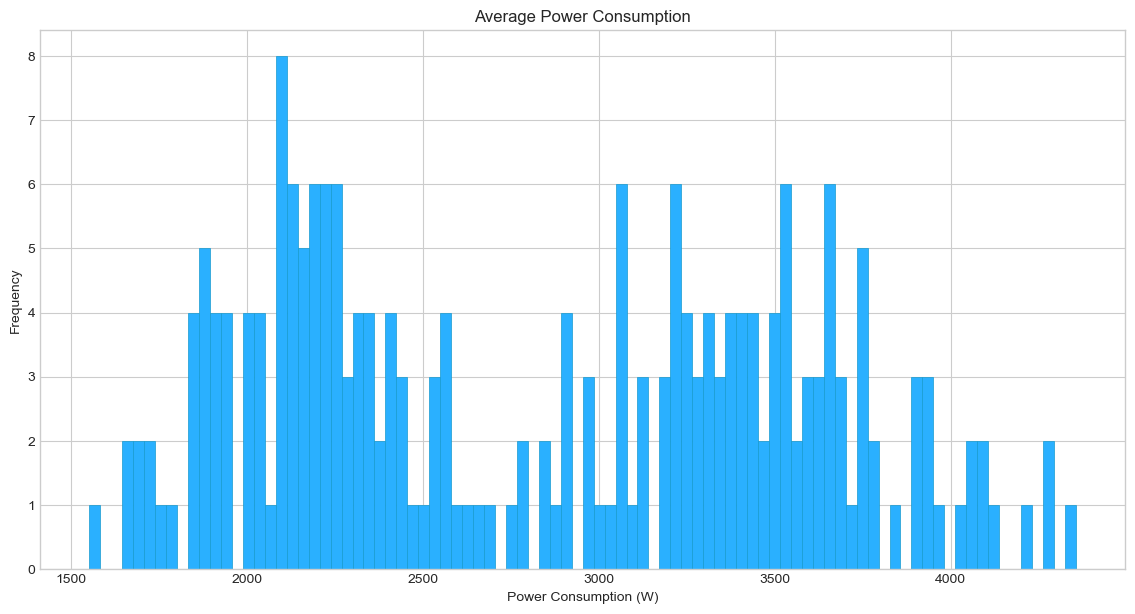

In [12]:
plt.figure(figsize=(14,7))
plt.style.use('seaborn-whitegrid')
plt.hist(df_clean['average_power_consumption'], bins=90, facecolor = '#2ab0ff', edgecolor='#169acf', linewidth=0.5)
plt.title('Average Power Consumption')
plt.xlabel('Power Consumption (W)')
plt.ylabel('Frequency')
plt.show()

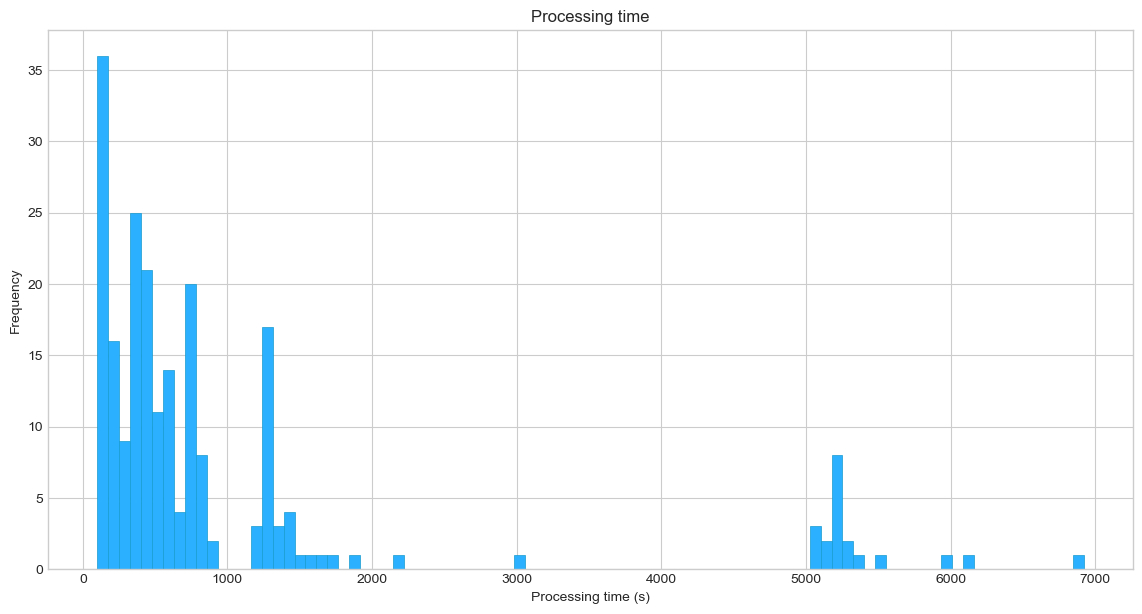

Kurtosis: 5.113723337196161
Skewness: 2.4958757523102597


In [13]:
plt.figure(figsize=(14,7))
plt.style.use('seaborn-whitegrid')
plt.hist(df_clean['processing_time'], bins=90, facecolor = '#2ab0ff', edgecolor='#169acf', linewidth=0.5)
plt.title('Processing time')
plt.xlabel('Processing time (s)')
plt.ylabel('Frequency')
plt.show()

print(f"Kurtosis: {df_clean['processing_time'].kurt()}")
print(f"Skewness: {df_clean['processing_time'].skew()}")

In [14]:
#we check the distribution of the data using histograms
for col in df_clean.columns:
    display(px.histogram(df, x=col))
    print(f"Kurtosis: {df_clean[col].kurt()}")
    print(f"Skewness: {df_clean[col].skew()}")

Kurtosis: 5.113723337196161
Skewness: 2.4958757523102597


Kurtosis: -1.2682095192932257
Skewness: 0.13359029232187267


Kurtosis: 7.649581779577133
Skewness: 2.5562282312359694


Kurtosis: -1.89684115600157
Skewness: -0.338631180593199


Kurtosis: 0.678059902055538
Skewness: 1.3321154999674727


Kurtosis: 1.469053718123161
Skewness: 1.5694262529150114


Kurtosis: 4.160282067642244
Skewness: 2.287239585345921


Kurtosis: 4.160282067642244
Skewness: 2.287239585345921


Kurtosis: 0.030760135289499946
Skewness: -0.4602913928489837


Kurtosis: -0.7044539457444583
Skewness: -0.449081922532743


Kurtosis: -1.1160386510712461
Skewness: 0.0530707745228542


Kurtosis: 0.1430040544370179
Skewness: -0.8377672799086527


Kurtosis: -0.9743589229895577
Skewness: -0.21484201975080147


Kurtosis: 17.571629032501438
Skewness: 3.172354135580154


Kurtosis: -0.5972316425836057
Skewness: -0.09009041215188186


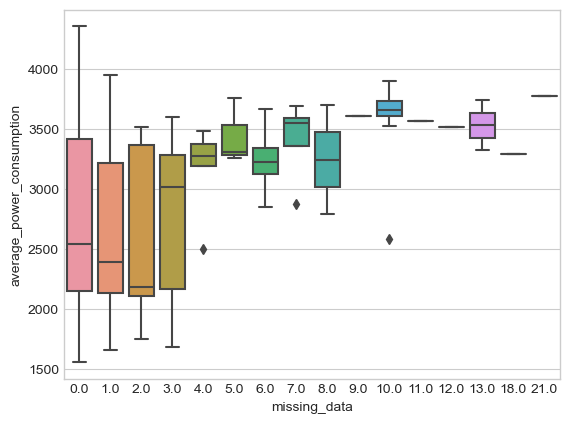

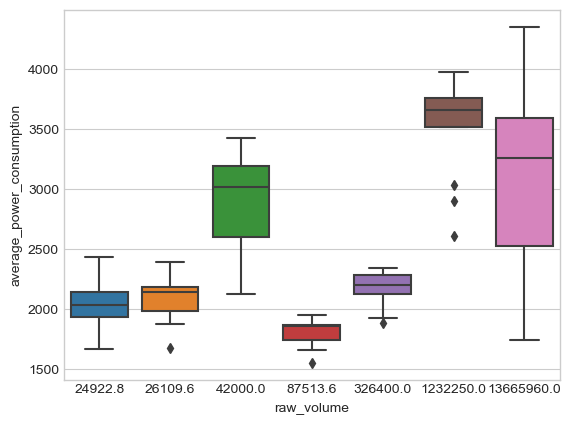

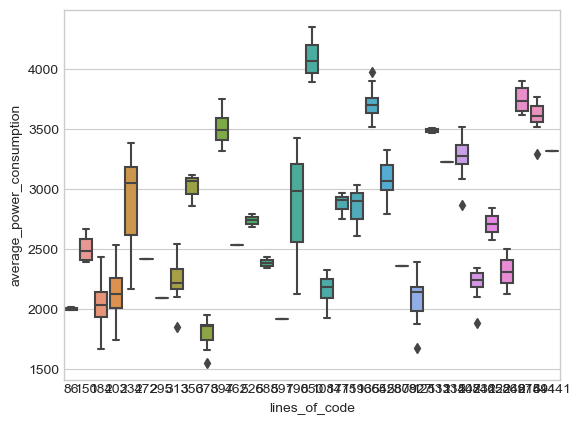

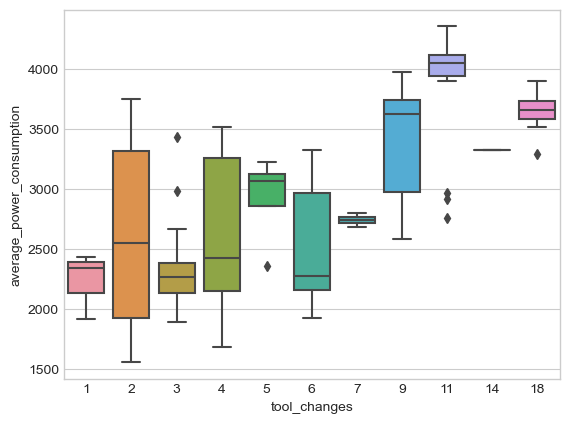

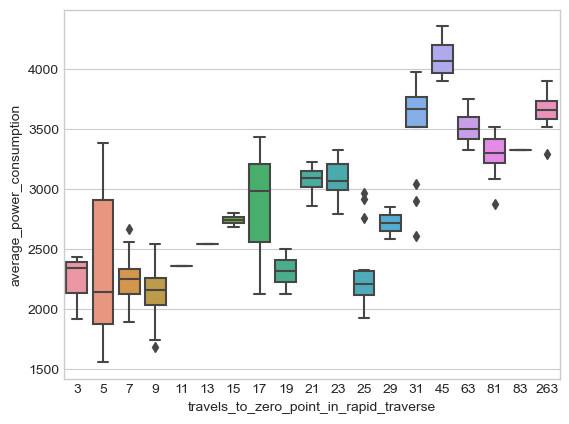

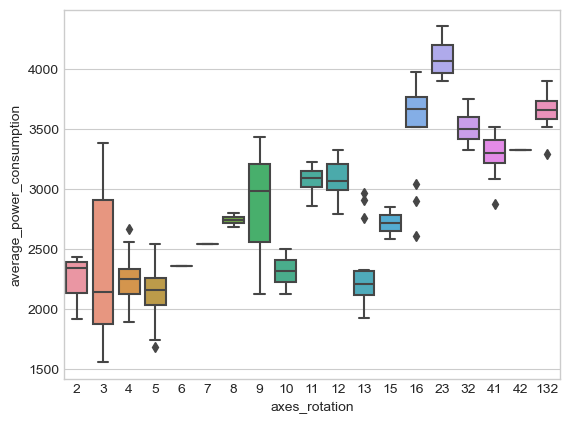

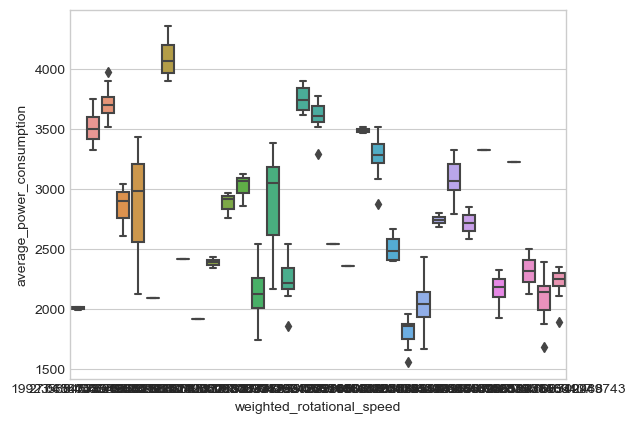

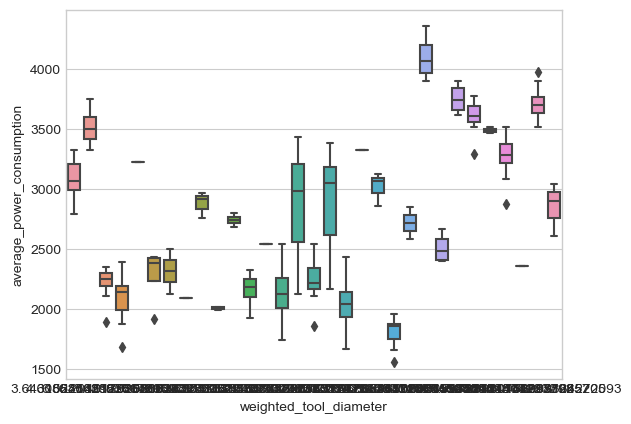

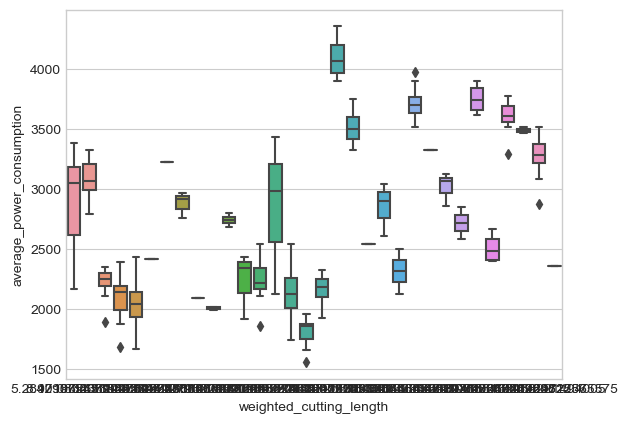

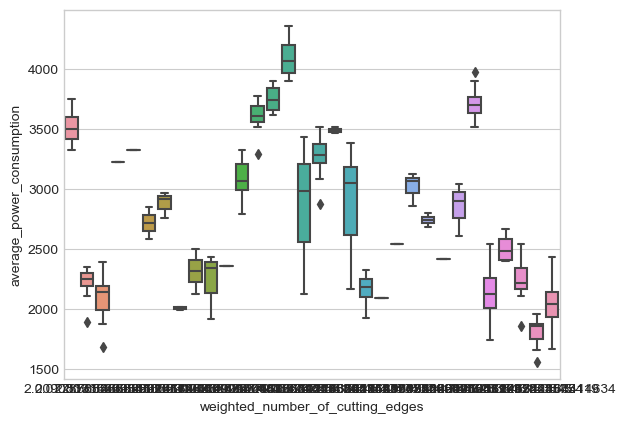

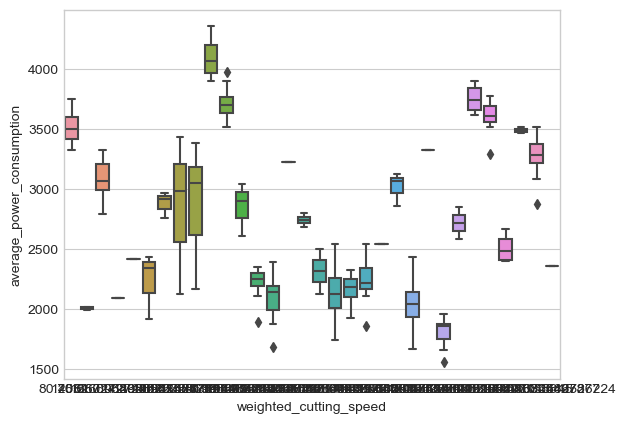

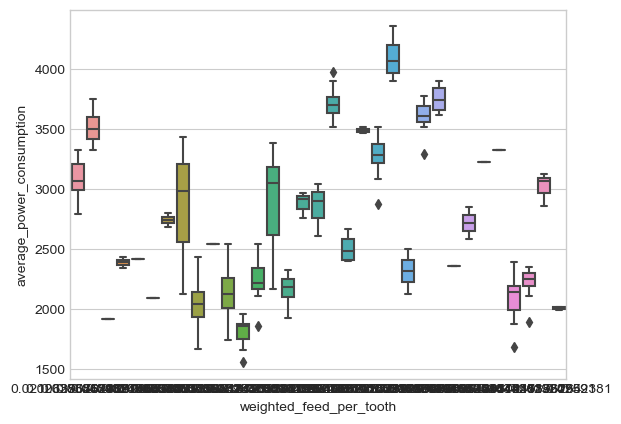

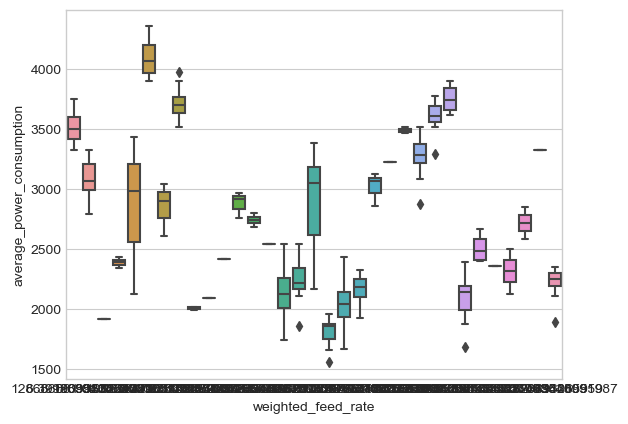

In [15]:
#comparing variables to power consumption
for col in df_clean.columns:
    if col != 'average_power_consumption' and col != 'processing_time':
        sns.boxplot( y=df_clean['average_power_consumption'], x=df_clean[col]);
        plt.show()

##### It seems that a higher amount of tool changes leads to higher power consumption. A higher amount of axes rotations and travels to zero point also result in a higher energy consumption.

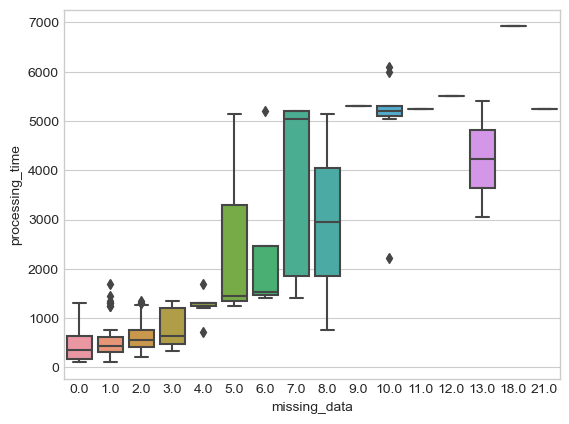

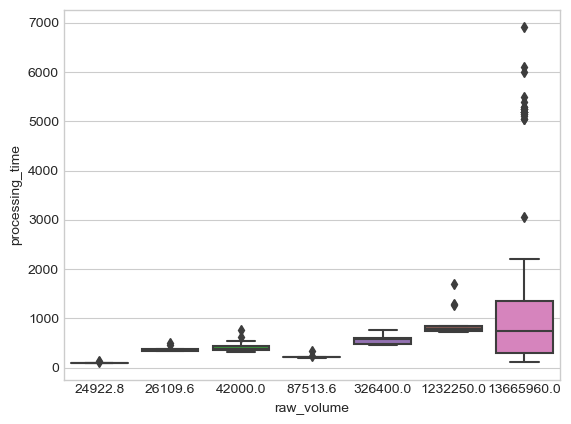

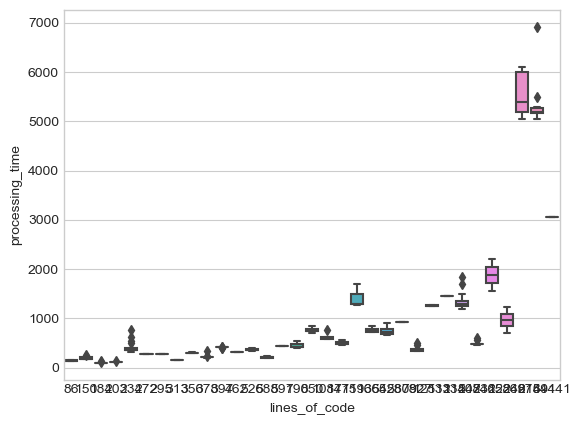

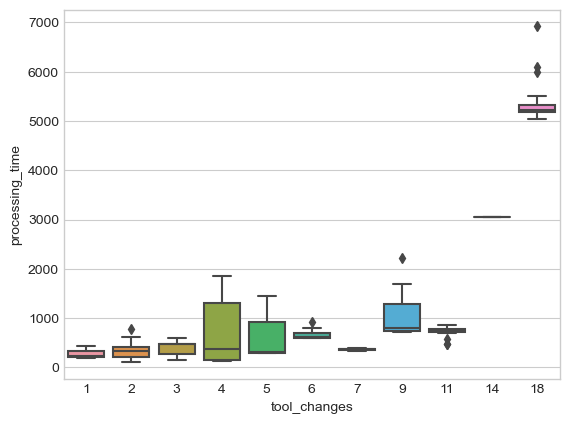

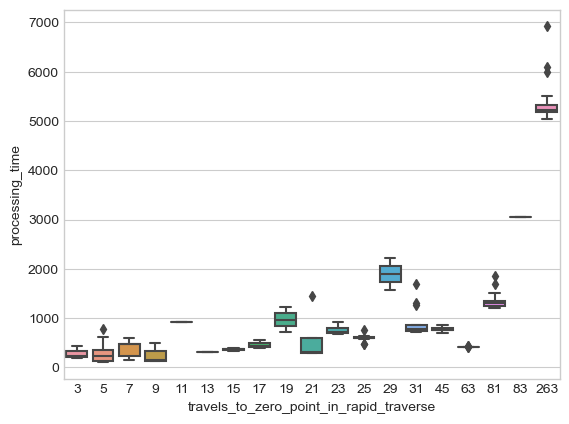

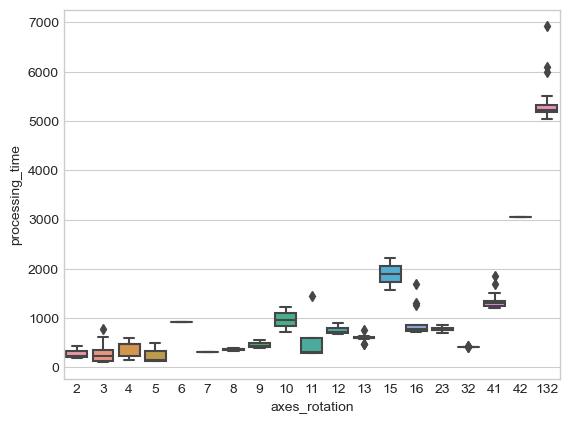

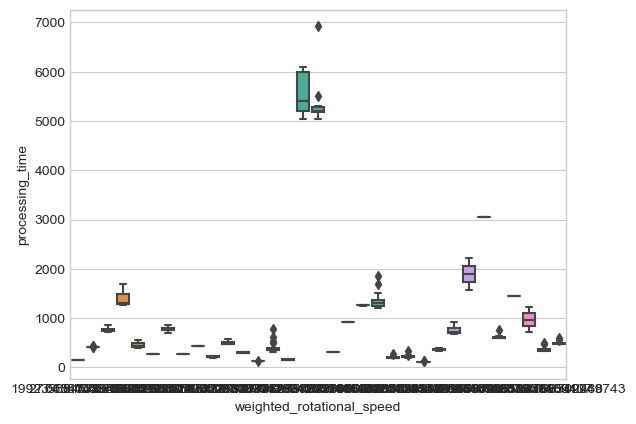

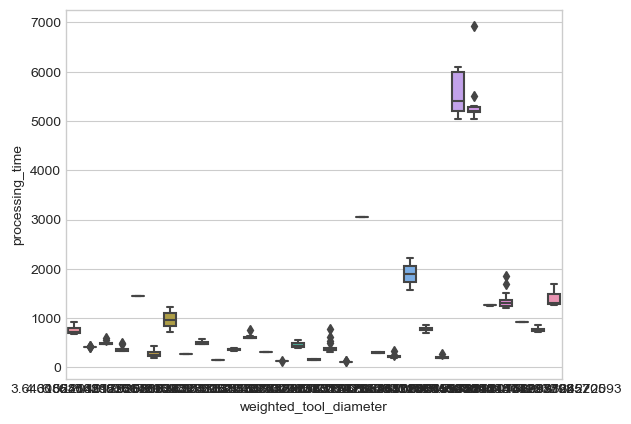

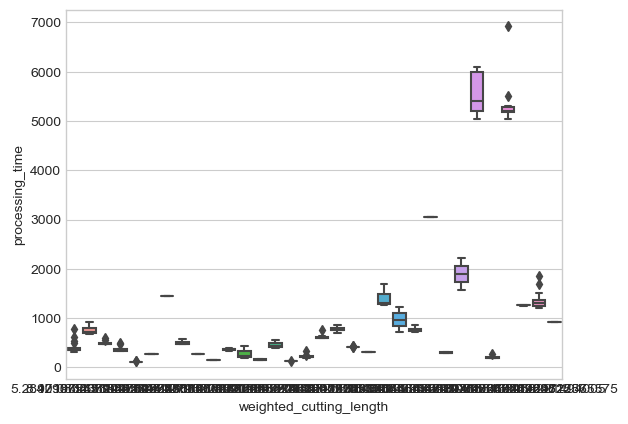

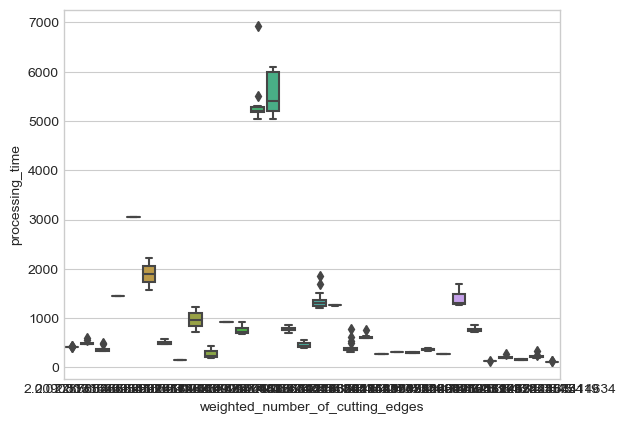

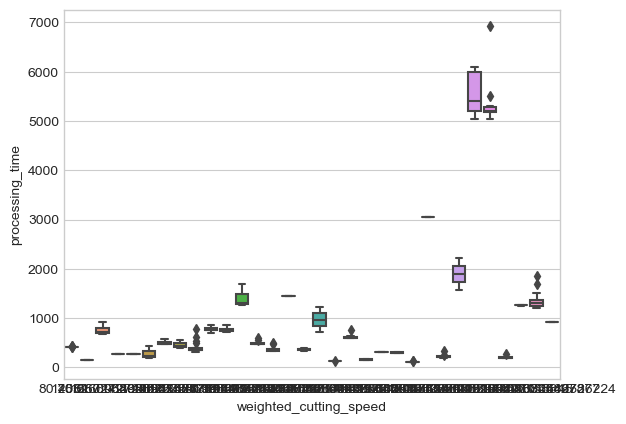

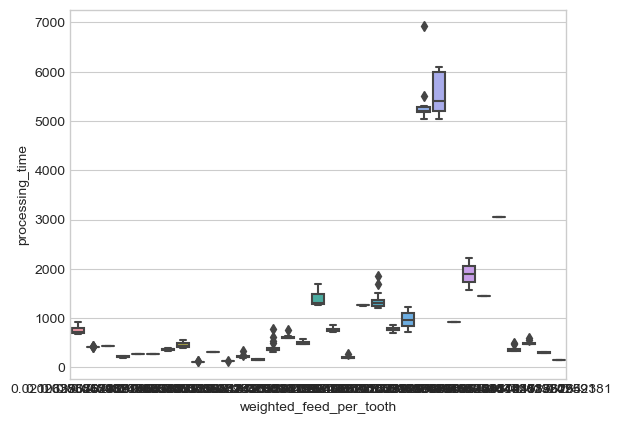

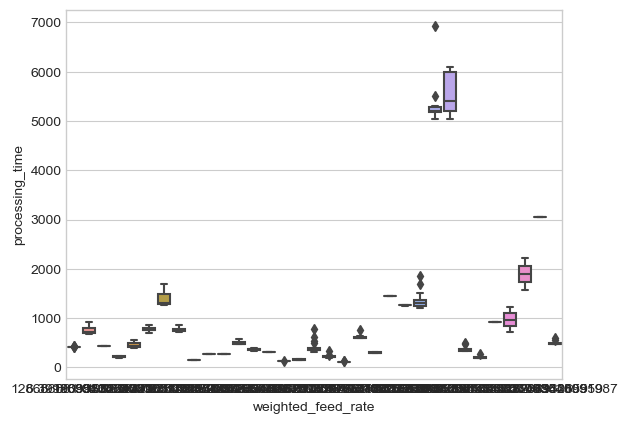

In [16]:
#comparing variables to processing time
for col in df_clean.columns:
    if col != 'average_power_consumption' and col != 'processing_time':
        sns.boxplot( y=df_clean['processing_time'], x=df_clean[col]);
        plt.show()

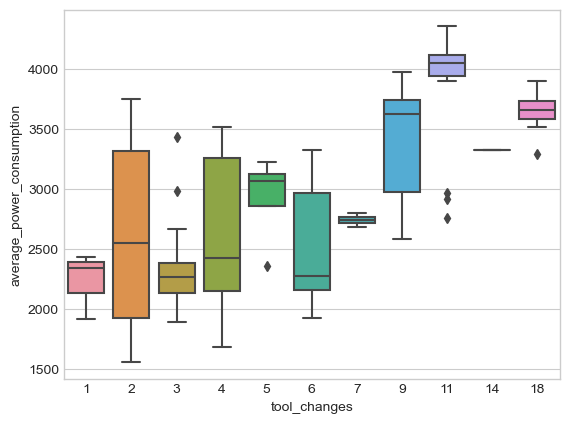

Pearson correlation: 0.5746583461735691
Spearman correlation: 0.5115110495073609


In [17]:
sns.boxplot( y=df_clean['average_power_consumption'], x=df_clean['tool_changes']);
plt.show()

correlation = df_clean['average_power_consumption'].corr(df_clean['tool_changes'])
print("Pearson correlation:", correlation)
spearman_corr = df_clean['average_power_consumption'].corr(df_clean['tool_changes'], method='spearman')
print("Spearman correlation:", spearman_corr)

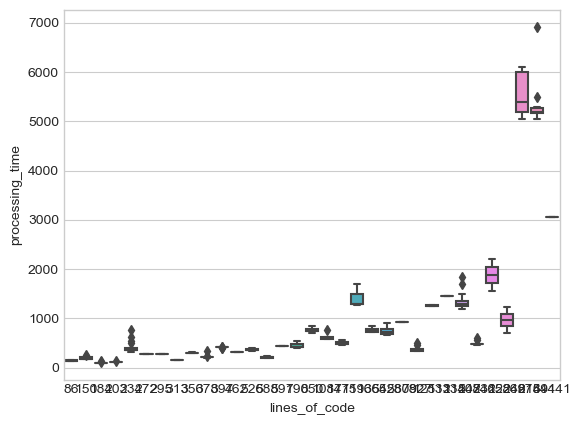

Pearson correlation: 0.7847163140470198
Spearman correlation: 0.8415903039825974


In [18]:
sns.boxplot( y=df_clean['processing_time'], x=df_clean['lines_of_code']);
plt.show()

correlation = df_clean['processing_time'].corr(df_clean['lines_of_code'])
print("Pearson correlation:", correlation)
spearman_corr = df_clean['processing_time'].corr(df_clean['lines_of_code'], method='spearman')
print("Spearman correlation:", spearman_corr)

#### Missing data, lines of code, tool changes, travels to machine zero point in rapid traverse, and axes rotation seem to have a direct relationship with processing time. This makes sense, since they are variables that are expected to grow over time.

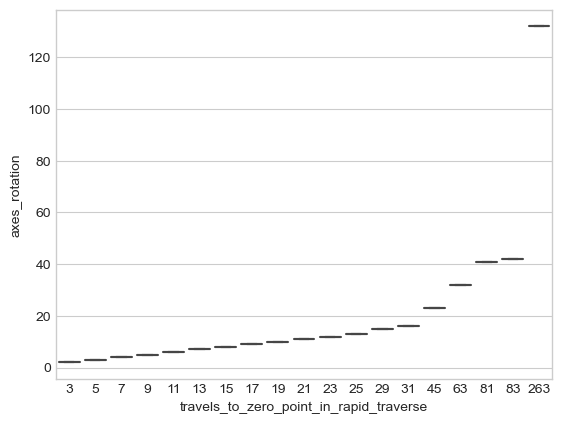

     travels_to_zero_point_in_rapid_traverse  axes_rotation
0                                         11              6
1                                         13              7
2                                          5              3
3                                          5              3
4                                          5              3
..                                       ...            ...
215                                        7              4
216                                        7              4
217                                        7              4
218                                       15              8
219                                       15              8

[220 rows x 2 columns]


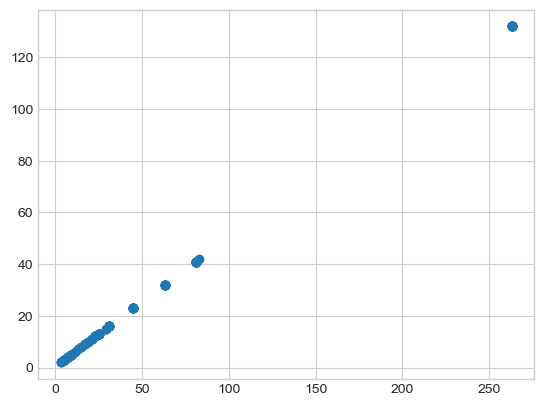

Pearson correlation: 1.0
Spearman correlation: 1.0


In [19]:
sns.boxplot( y=df_clean['axes_rotation'], x=df_clean['travels_to_zero_point_in_rapid_traverse']);
plt.show()

print(df_clean[['travels_to_zero_point_in_rapid_traverse', 'axes_rotation']])

plt.scatter(x=df_clean['travels_to_zero_point_in_rapid_traverse'],y=df_clean['axes_rotation'])
plt.show()

correlation = df_clean['travels_to_zero_point_in_rapid_traverse'].corr(df_clean['axes_rotation'])
print("Pearson correlation:", correlation)
spearman_corr = df_clean['travels_to_zero_point_in_rapid_traverse'].corr(df_clean['axes_rotation'], method='spearman')
print("Spearman correlation:", spearman_corr)

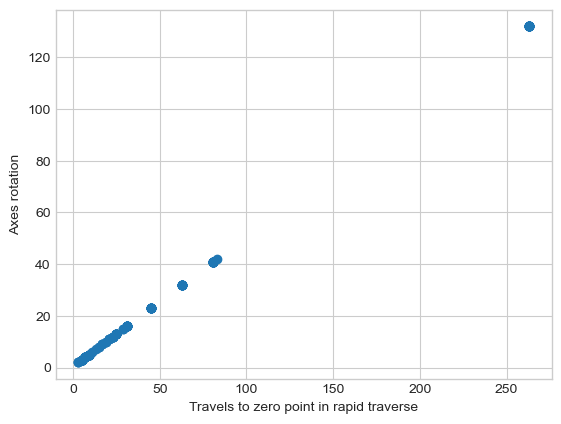

In [20]:
plt.scatter(x=df_clean['travels_to_zero_point_in_rapid_traverse'],y=df_clean['axes_rotation'])
plt.xlabel("Travels to zero point in rapid traverse")
plt.ylabel("Axes rotation")
plt.show()

#### There is a direct relationship between the travels to zero point in rapid traverse and axes rotations. An increase in 1 travel to machine zero point results in an increase of 1 axes rotation. This can lead our models to show biased results.

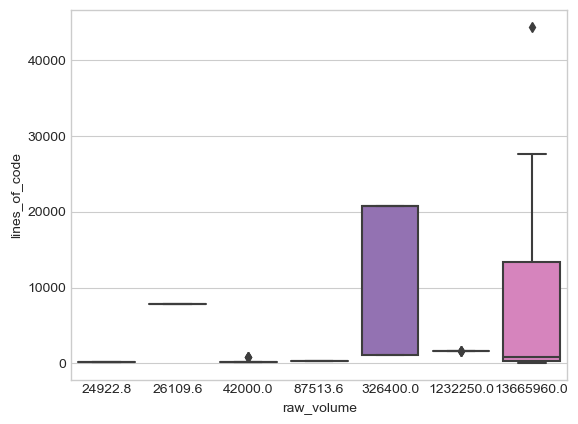

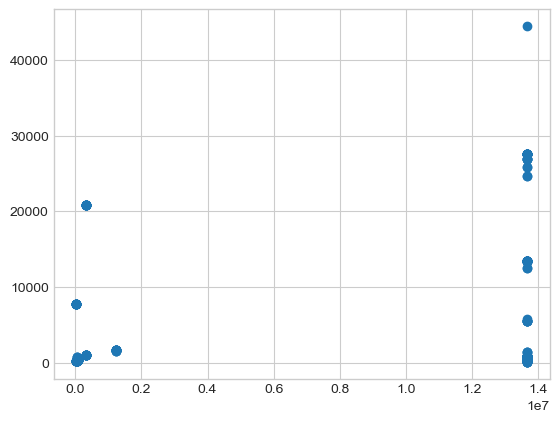

Pearson correlation: 0.2349769559023315
Spearman correlation: 0.26439414044170395


In [21]:
sns.boxplot( y=df['lines_of_code'], x=df['raw_volume']);
plt.show()

plt.scatter(x=df['raw_volume'],y=df['lines_of_code'])
plt.show()

correlation = df['raw_volume'].corr(df['lines_of_code'])
print("Pearson correlation:", correlation)
spearman_corr = df['raw_volume'].corr(df['lines_of_code'], method='spearman')
print("Spearman correlation:", spearman_corr)

#### There is little correlation between raw volume and lines of code.

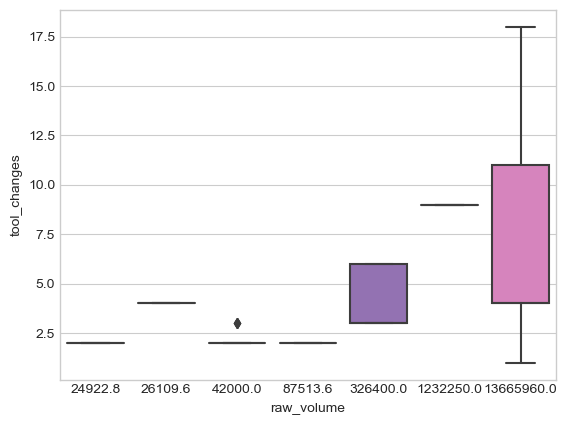

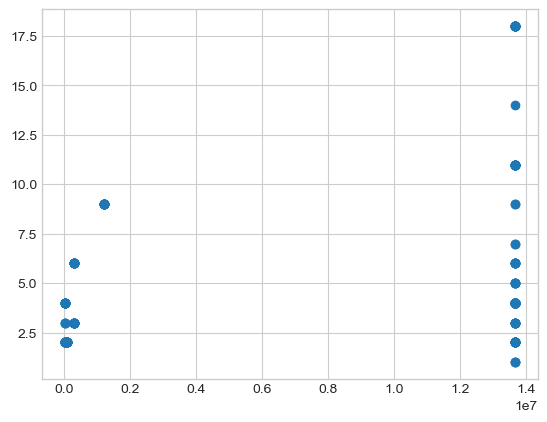

Pearson correlation: 0.34789658746377167
Spearman correlation: 0.46434391397233193


In [22]:
sns.boxplot( y=df['tool_changes'], x=df['raw_volume']);
plt.show()

plt.scatter(x=df['raw_volume'],y=df['tool_changes'])
plt.show()

correlation = df['raw_volume'].corr(df['tool_changes'])
print("Pearson correlation:", correlation)
spearman_corr = df['raw_volume'].corr(df['tool_changes'], method='spearman')
print("Spearman correlation:", spearman_corr)

#### There is little correlation between raw volume and tool changes.

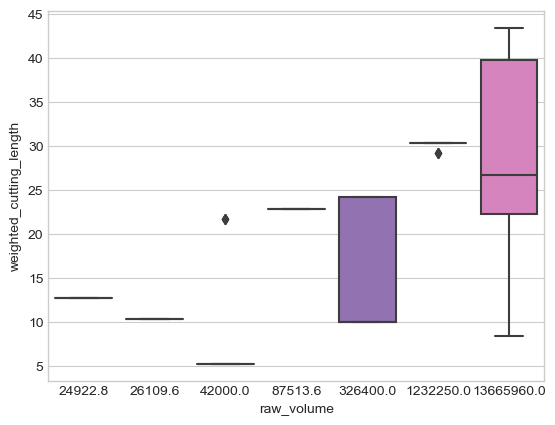

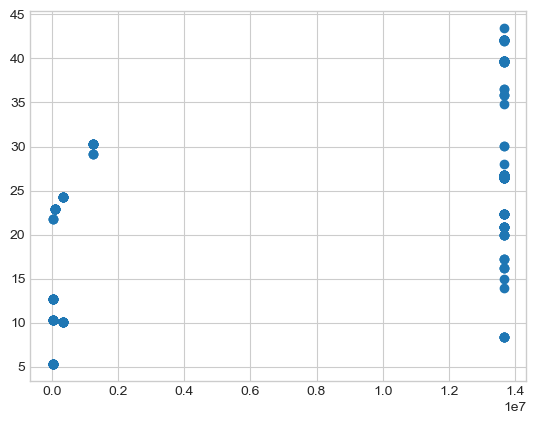

Pearson correlation: 0.6013664029894994
Spearman correlation: 0.6125968497958432


In [23]:
sns.boxplot( y=df['weighted_cutting_length'], x=df['raw_volume']);
plt.show()

plt.scatter(x=df['raw_volume'],y=df['weighted_cutting_length'])
plt.show()

correlation = df['raw_volume'].corr(df['weighted_cutting_length'])
print("Pearson correlation:", correlation)
spearman_corr = df['raw_volume'].corr(df['weighted_cutting_length'], method='spearman')
print("Spearman correlation:", spearman_corr)

##### There is some correlation between raw volume and cutting length.

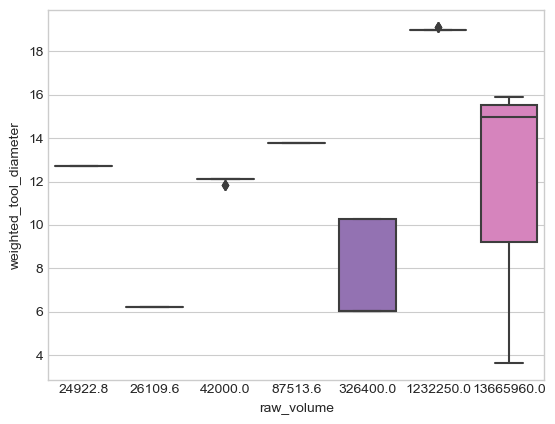

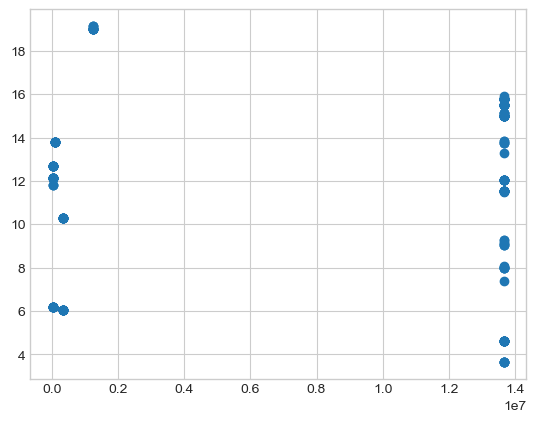

Pearson correlation: 0.09526442755122518
Spearman correlation: 0.17645040299279424


In [24]:
sns.boxplot( y=df['weighted_tool_diameter'], x=df['raw_volume']);
plt.show()

plt.scatter(x=df['raw_volume'],y=df['weighted_tool_diameter'])
plt.show()

correlation = df['raw_volume'].corr(df['weighted_tool_diameter'])
print("Pearson correlation:", correlation)
spearman_corr = df['raw_volume'].corr(df['weighted_tool_diameter'], method='spearman')
print("Spearman correlation:", spearman_corr)

##### There is no correlation between raw volume and tool diameter.

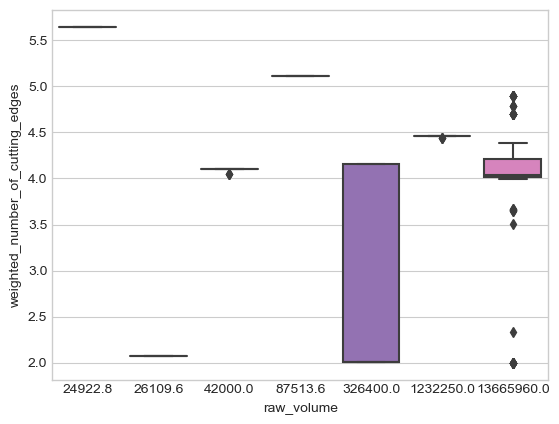

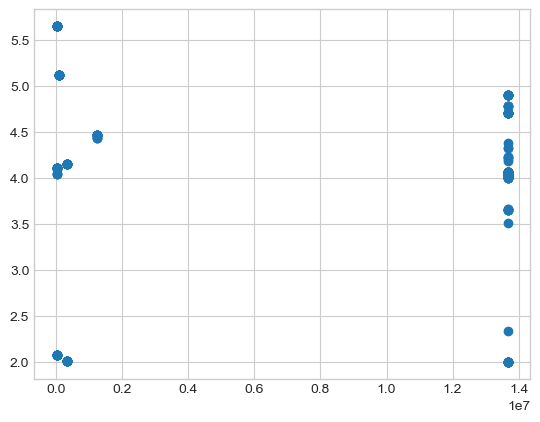

Pearson correlation: 0.00494046097662286
Spearman correlation: -0.24331866059347407


In [25]:
sns.boxplot( y=df['weighted_number_of_cutting_edges'], x=df['raw_volume']);
plt.show()

plt.scatter(x=df['raw_volume'],y=df['weighted_number_of_cutting_edges'])
plt.show()

correlation = df['raw_volume'].corr(df['weighted_number_of_cutting_edges'])
print("Pearson correlation:", correlation)
spearman_corr = df['raw_volume'].corr(df['weighted_number_of_cutting_edges'], method='spearman')
print("Spearman correlation:", spearman_corr)

##### No observed statistical association between raw volume and the number of cutting edges of the worktool. We observe some outliers too.

##### Raw volume shows little association with worktool feature selection, except with cutter length. It also shows little to no correlation with the number of lines of code.

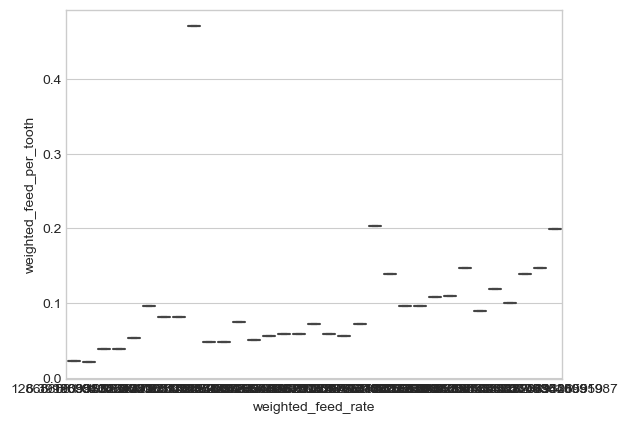

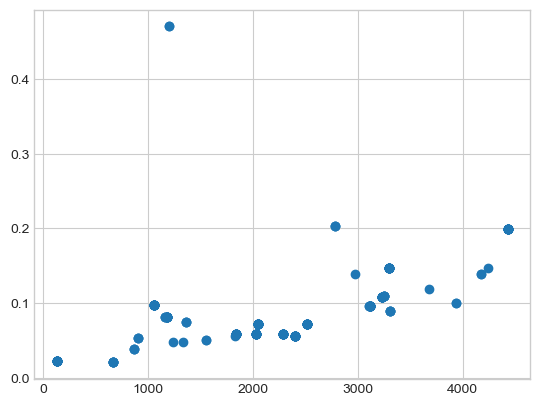

Pearson correlation: 0.5229033123630805
Spearman correlation: 0.6983498372234552


In [26]:
sns.boxplot( y=df['weighted_feed_per_tooth'], x=df['weighted_feed_rate']);
plt.show()

plt.scatter(x=df['weighted_feed_rate'],y=df['weighted_feed_per_tooth'])
plt.show()

correlation = df['weighted_feed_rate'].corr(df['weighted_feed_per_tooth'])
print("Pearson correlation:", correlation)
spearman_corr = df['weighted_feed_rate'].corr(df['weighted_feed_per_tooth'], method='spearman')
print("Spearman correlation:", spearman_corr)

##### There is some correlation between feed rate and feed per tooth. The literature also indicates a relationship between both variables.

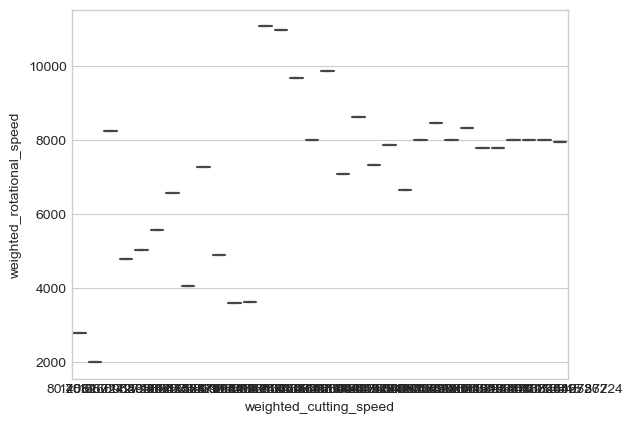

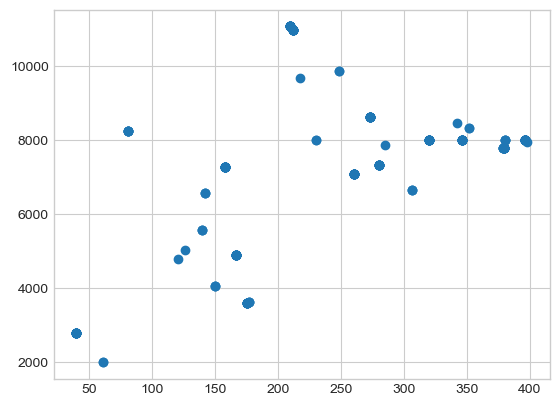

Pearson correlation: 0.4845893282464314
Spearman correlation: 0.4372816293958843


In [27]:
sns.boxplot( y=df['weighted_rotational_speed'], x=df['weighted_cutting_speed']);
plt.show()

plt.scatter(x=df['weighted_cutting_speed'],y=df['weighted_rotational_speed'])
plt.show()

correlation = df['weighted_cutting_speed'].corr(df['weighted_rotational_speed'])
print("Pearson correlation:", correlation)
spearman_corr = df['weighted_cutting_speed'].corr(df['weighted_rotational_speed'], method='spearman')
print("Spearman correlation:", spearman_corr)

##### There is a small correlation between cutting speed and rotational speed.

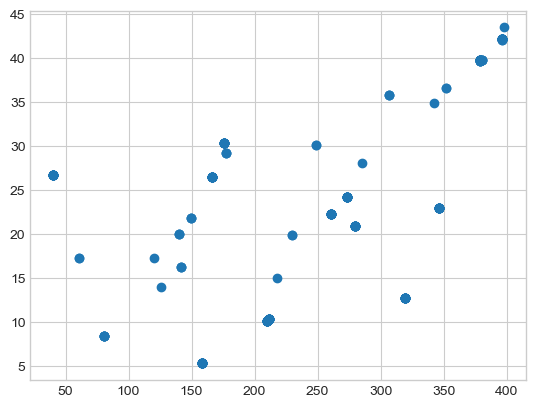

Pearson correlation: 0.5982494288713955
Spearman correlation: 0.597848495389027


In [28]:
#Compare processing time and power consumption
plt.scatter(x=df['weighted_cutting_speed'],y=df['weighted_cutting_length'])
plt.show()

correlation = df['weighted_cutting_speed'].corr(df['weighted_cutting_length'])
print("Pearson correlation:", correlation)
spearman_corr = df['weighted_cutting_speed'].corr(df['weighted_cutting_length'], method='spearman')
print("Spearman correlation:", spearman_corr)

##### There is a statistical correlation between cutting lenght and cutting speed.

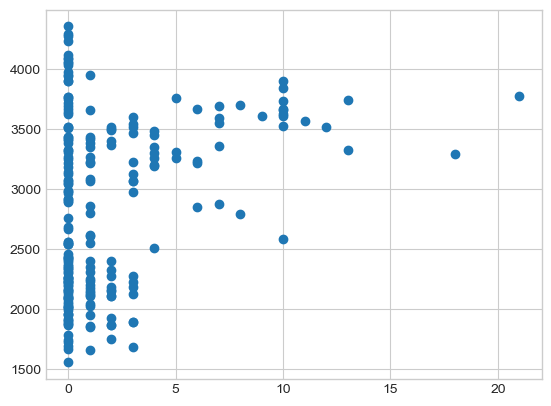

Pearson correlation: 0.317984175687329
Spearman correlation: 0.20421837300232748


In [29]:
plt.scatter(x=df['missing_data'],y=df['average_power_consumption'])
plt.show()

correlation = df['missing_data'].corr(df['average_power_consumption'])
print("Pearson correlation:", correlation)
spearman_corr = df['missing_data'].corr(df['average_power_consumption'], method='spearman')
print("Spearman correlation:", spearman_corr)

#### There is a small correlation between missing data and average power consumption.

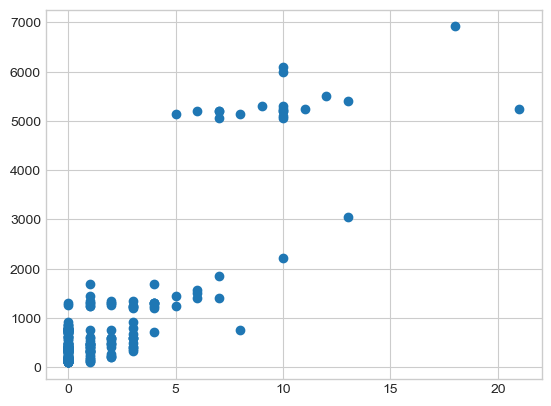

Pearson correlation: 0.8635476427765137
Spearman correlation: 0.6164762168723189


In [30]:
plt.scatter(x=df['missing_data'],y=df['processing_time'])
plt.show()

correlation = df['missing_data'].corr(df['processing_time'])
print("Pearson correlation:", correlation)
spearman_corr = df['missing_data'].corr(df['processing_time'], method='spearman')
print("Spearman correlation:", spearman_corr)

#### There seems to be a high statistical correlation between processing time and missing data. Processing time and missing data increase at the same rate.

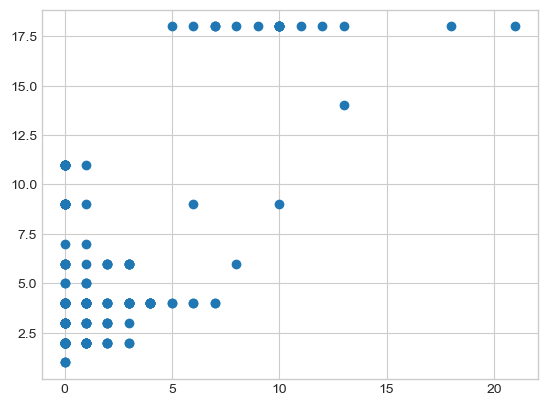

Pearson correlation: 0.6682325765985043
Spearman correlation: 0.3465243878037553


In [31]:
plt.scatter(x=df['missing_data'],y=df['tool_changes'])
plt.show()

correlation = df['missing_data'].corr(df['tool_changes'])
print("Pearson correlation:", correlation)
spearman_corr = df['missing_data'].corr(df['tool_changes'], method='spearman')
print("Spearman correlation:", spearman_corr)

#### Missing data and tool changes are also correlated.

In [32]:
for col in df_clean.columns:
    data = [df[col].tolist()]  # List of lists for the data
    group_labels = [col]  # Corresponding labels for the data

    # Create the distribution plot
    fig = ff.create_distplot(data, group_labels, show_hist=False)
    fig.show()

#### Processing times are in the shorter range. Average power consumption is evenly distributed.

Pearson:

tool_changes and average power consumption: 0.5746583461735691
travels_to_zero_point_in_rapid_traverse and average power consumption: 0.556157305585982
axes_rotation and average power consumption: 0.556157305585982

missing_data and processing time: 0.8635476427765137
lines_of_code and processing time: 0.7847163140470198
tool_changes and processing time: 0.8539617274136415
travels_to_zero_point_in_rapid_traverse and processing time: 0.9663155799051548
axes_rotation and processing time: 0.9663155799051548
weighted_cutting_length and processing time: 0.5523061166813198


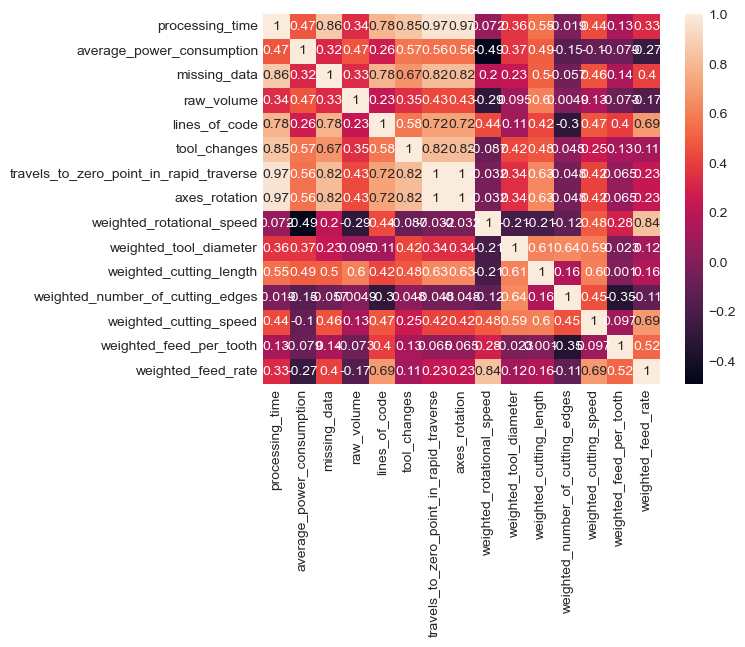

In [33]:
#show correlations
sns.heatmap(df_clean.corr(), annot=True)

print('Pearson:\n')
for col in df_clean:
    correlation = df_clean[col].corr(df_clean['average_power_consumption'])
    if correlation > 0.5 and col != 'average_power_consumption':
        print(col,'and average power consumption:', correlation)

print()
        
for col in df_clean:
    correlation = df_clean[col].corr(df_clean['processing_time'])
    if correlation > 0.5 and col != 'processing_time':
        print(col,'and processing time:', correlation)

Spearman:

raw_volume and average power consumption: 0.5042751738370295
tool_changes and average power consumption: 0.5115110495073609
travels_to_zero_point_in_rapid_traverse and average power consumption: 0.7296576532396314
axes_rotation and average power consumption: 0.7296576532396314
weighted_cutting_length and average power consumption: 0.5219656716232501

missing_data and processing time (Spearman): 0.6164762168723189
lines_of_code and processing time (Spearman): 0.8415903039825974
tool_changes and processing time (Spearman): 0.6527616307815517
travels_to_zero_point_in_rapid_traverse and processing time (Spearman): 0.8020616583940616
axes_rotation and processing time (Spearman): 0.8020616583940616
weighted_cutting_length and processing time (Spearman): 0.6077310908498789
weighted_feed_per_tooth and processing time (Spearman): 0.5049284314529247


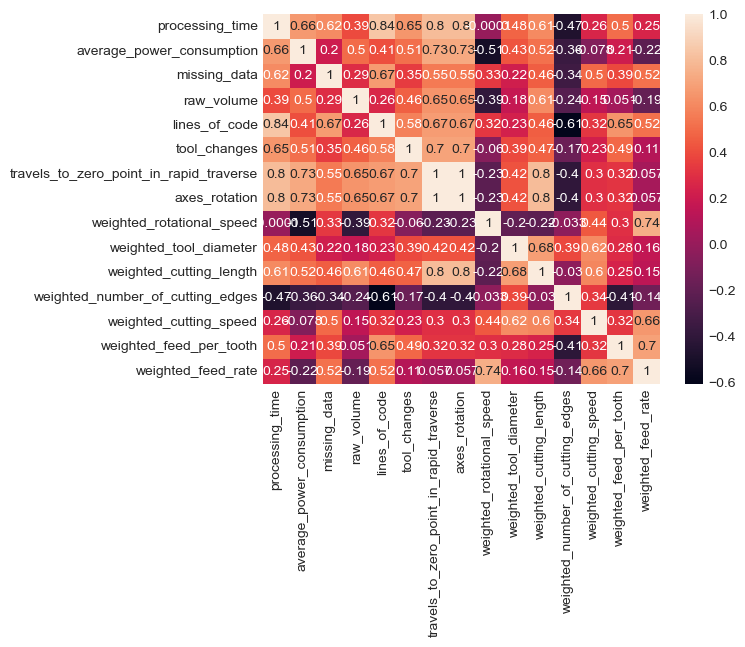

In [34]:
#show correlations
sns.heatmap(df_clean.corr(method='spearman'), annot=True)

print('Spearman:\n')
for col in df_clean:
    correlation = df_clean[col].corr(df_clean['average_power_consumption'], method='spearman')
    if correlation > 0.5 and col != 'average_power_consumption' and col != 'processing_time':
        print(col,'and average power consumption:', correlation)

print()    

for col in df_clean:
    correlation = df_clean[col].corr(df_clean['processing_time'], method='spearman')
    if correlation > 0.5 and col != 'processing_time' and col != 'average_power_consumption':
        print(col,'and processing time (Spearman):', correlation)

# Preprocessing

In [35]:
##df_clean['percentage_of_missing_data'] = (df_clean['missing_data'] / (df_clean['processing_time']/60)) * 100

In [36]:
##df_clean[df_clean['percentage_of_missing_data']>30]

#### I remove travels to zero point in rapid traverse from the dataset. It has a direct relationship with axes rotations, and can lead to biased causal graphical models. Algorithms like DirectLiNGAM and ReSiT can struggle with perfectly correlated variables, as they aim to establish causal relationships based on unique patterns in the data. Including two perfectly correlated variables might obscure the actual causal relationships among other variables. I keep axes rotations given it is more informative.

#### I also remove missing_data from the dataset. It does not provide relevant information to the study.

In [37]:
#Select variables for power consumtpion prediction
df_pc = df_clean.drop(['processing_time','travels_to_zero_point_in_rapid_traverse', 'missing_data'], axis=1)

In [38]:
#Select variables for processing time prediction
df_pt = df_clean.drop(['average_power_consumption', 'travels_to_zero_point_in_rapid_traverse', 'missing_data'], axis=1)

#### Scale the data using Standard Scaler. Give equal importance to all variables, reduce bias, and improve the interpretability of the causal graphs.

In [39]:
scaler = StandardScaler()

#scale data for power consumption
df_pc_sc = scaler.fit_transform(df_pc)

#put the scaled data back into the dataframe
columns_pc = df_pc.columns
df_pc_sc = pd.DataFrame(df_pc_sc, columns=columns_pc)

In [40]:
#scale data for processing time
df_pt_sc = scaler.fit_transform(df_pt)

#put the scaled data back into the dataframe
columns_pt = df_pt.columns
df_pt_sc = pd.DataFrame(df_pt_sc, columns=columns_pt)

# Causal Graphs

### Hypothesis

In [41]:
labels_pc = [f'{i}. {col}' for i, col in enumerate(df_pc.columns)]

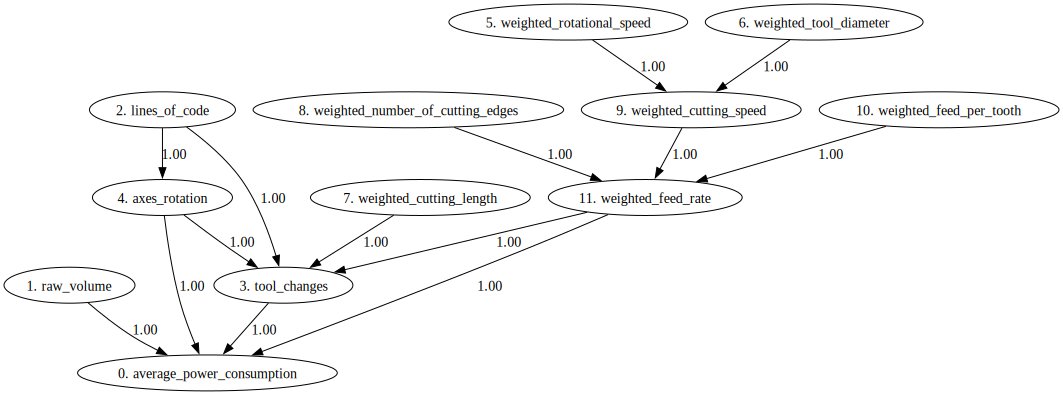

In [42]:
manual_matrix_pc = [
    [0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1],
    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0]
]

manual_matrix_pc = np.array(manual_matrix_pc)

pc_manual = make_dot(manual_matrix_pc, labels=labels_pc)

pc_manual

#pc_manual.format = 'png'
#pc_manual.render('dag')

In [43]:
labels_pt = [f'{i}. {col}' for i, col in enumerate(df_pt_sc.columns)]

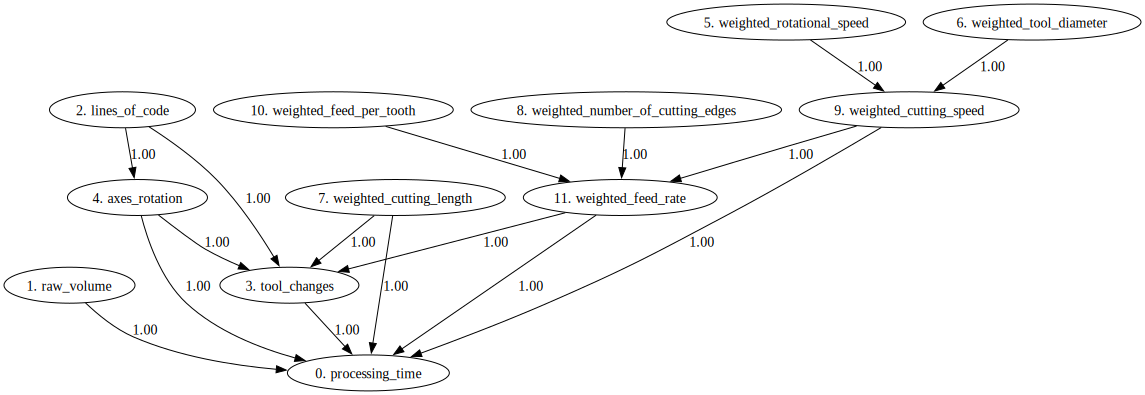

In [44]:
manual_matrix_pt = [
    [0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1],
    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0]
]

manual_matrix_pt = np.array(manual_matrix_pt)

pt_manual = make_dot(manual_matrix_pt, labels=labels_pt)

pt_manual

#pt_manual.format = 'png'
#pt_manual.render('dag')

### Causal discovery using DirectLiNGAM

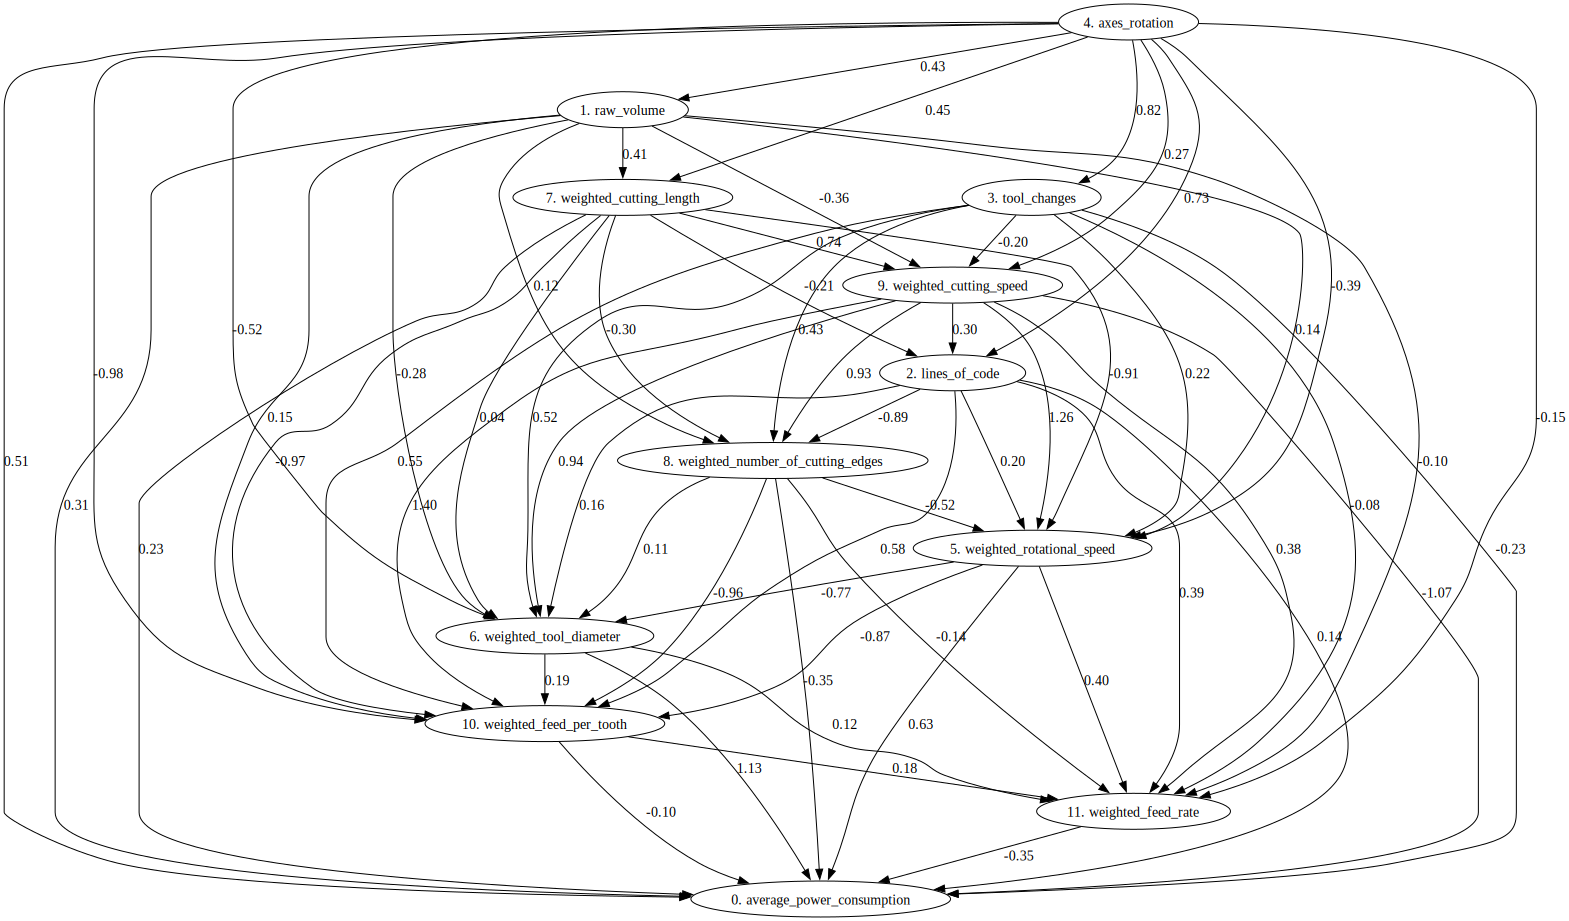

In [45]:
#create lingam model for power consumption
lingam_pc = lingam.DirectLiNGAM()
lingam_pc.fit(df_pc_sc)

pc_lingam = make_dot(lingam_pc.adjacency_matrix_, labels=labels_pc)
pc_lingam

# Save png
#pc_lingam.format = 'png'
#pc_lingam.render('pc_lingam')

In [46]:
# Create a DataFrame from the matrix with specific column and row names
lingam_adjacency_matrix_pc = pd.DataFrame(lingam_pc.adjacency_matrix_, columns=df_pc_sc.columns, index=df_pc_sc.columns)

display(lingam_adjacency_matrix_pc)

print(f'Connecting nodes to average power consumption:\n{lingam_adjacency_matrix_pc.iloc[0]}')

average_power_consumption  raw_volume  \
average_power_consumption                               0.0    0.306779   
raw_volume                                              0.0    0.000000   
lines_of_code                                           0.0    0.000000   
tool_changes                                            0.0    0.000000   
axes_rotation                                           0.0    0.000000   
weighted_rotational_speed                               0.0    0.135492   
weighted_tool_diameter                                  0.0   -0.277332   
weighted_cutting_length                                 0.0    0.406435   
weighted_number_of_cutting_edges                        0.0    0.122744   
weighted_cutting_speed                                  0.0   -0.359640   
weighted_feed_per_tooth                                 0.0    0.151278   
weighted_feed_rate                                      0.0   -0.095771   

                                  lines_of_code  tool_changes  axes_rotation  \
average_power_consumption              0.137709     -0.231685       0.512619   
raw_volume                             0.000000      0.000000       0.430704   
lines_of_code                          0.000000      0.000000       0.734468   
tool_changes                           0.000000      0.000000       0.818497   
axes_rotation                          0.000000      0.000000       0.000000   
weighted_rotational_speed              0.197121      0.217480      -0.389658   
weighted_tool_diameter                 0.162396      0.524684      -0.515858   
weighted_cutting_length                0.000000      0.000000       0.452588   
weighted_number_of_cutting_edges      -0.889692      0.430457       0.000000   
weighted_cutting_speed                 0.000000     -0.201044       0.271389   
weighted_feed_per_tooth                0.576323      0.552846      -0.983654   
weighted_feed_rate                     0.392759     -0.083989      -0.153708   

                                  weighted_rotational_speed  \
average_power_consumption                          0.625470   
raw_volume                                         0.000000   
lines_of_code                                      0.000000   
tool_changes                                       0.000000   
axes_rotation                                      0.000000   
weighted_rotational_speed                          0.000000   
weighted_tool_diameter                            -0.771865   
weighted_cutting_length                            0.000000   
weighted_number_of_cutting_edges                   0.000000   
weighted_cutting_speed                             0.000000   
weighted_feed_per_tooth                           -0.868365   
weighted_feed_rate                                 0.395503   

                                  weighted_tool_diameter  \
average_power_consumption                       1.132963   
raw_volume                                      0.000000   
lines_of_code                                   0.000000   
tool_changes                                    0.000000   
axes_rotation                                   0.000000   
weighted_rotational_speed                       0.000000   
weighted_tool_diameter                          0.000000   
weighted_cutting_length                         0.000000   
weighted_number_of_cutting_edges                0.000000   
weighted_cutting_speed                          0.000000   
weighted_feed_per_tooth                         0.188853   
weighted_feed_rate                              0.124360   

                                  weighted_cutting_length  \
average_power_consumption                        0.234262   
raw_volume                                       0.000000   
lines_of_code                                   -0.213113   
tool_changes                                     0.000000   
axes_rotation                                    0.000000   
weighted_rotational_speed                       -0

Connecting nodes to average power consumption:
average_power_consumption           0.000000
raw_volume                          0.306779
lines_of_code                       0.137709
tool_changes                       -0.231685
axes_rotation                       0.512619
weighted_rotational_speed           0.625470
weighted_tool_diameter              1.132963
weighted_cutting_length             0.234262
weighted_number_of_cutting_edges   -0.346401
weighted_cutting_speed             -1.070683
weighted_feed_per_tooth            -0.103846
weighted_feed_rate                 -0.347777
Name: average_power_consumption, dtype: float64


#### "weighted_tool_diameter" has the strongest positive relationship with "average power consumption" (1.114563). This suggests that larger tool diameters are strongly associated with higher power consumption. "weighted_rotational_speed" (0.625758) and "axes_rotation" (0.550771) also have strong positive relationships. Faster rotation speeds and more axis rotations tend to increase power consumption. "raw_volume" (0.302121) and "lines_of_code" (0.189095) also show positive relationships, suggesting that more complex or larger-scale operations might correlate with higher power consumption.

#### "weighted_cutting_speed" (-1.056882) shows a strong negative relationship. This could suggest that higher cutting speeds are associated with lower power consumption, possibly due to efficiency gains. "weighted_number_of_cutting_edges" (-0.332088) and "weighted_feed_rate" (-0.361292) also have negative relationships. This may indicate that more cutting edges or higher feed rates reduce power consumption, perhaps due to increased efficiency.

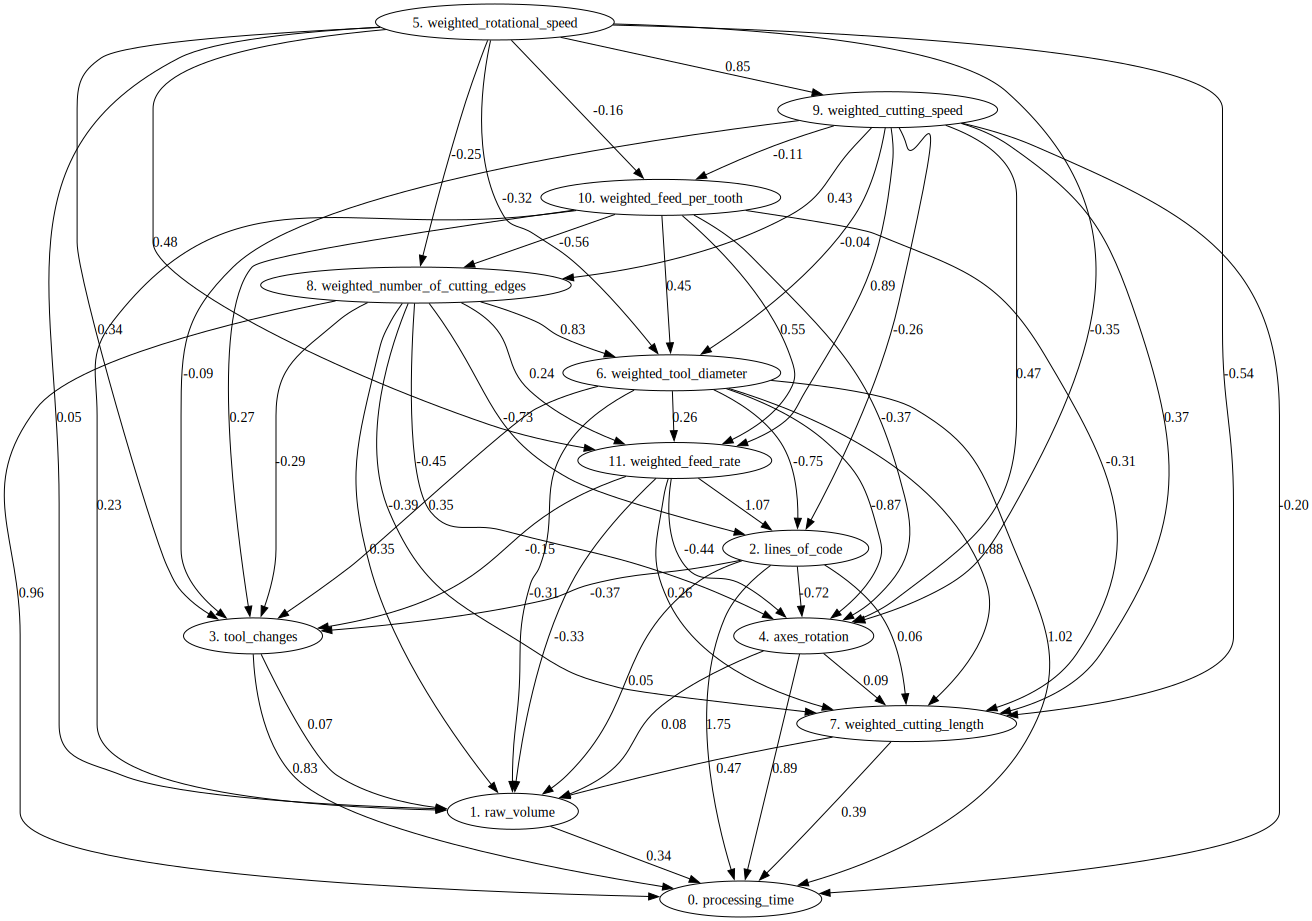

In [47]:
lingam_pt = lingam.DirectLiNGAM()
lingam_pt.fit(df_pt_sc)

# Transpose the adjacency matrix to reverse the edge directions
reversed_adjacency_matrix = np.transpose(lingam_pt.adjacency_matrix_)

pt_lingam = make_dot(reversed_adjacency_matrix, labels=labels_pt)

pt_lingam

# Save png
#pt_lingam.format = 'png'
#pt_lingam.render('dag')

In [48]:
# Create a directed graph using Graphviz
#G = graphviz.Digraph()

# Make sure `labels` has the correct length to match the adjacency matrix
# `df_pt_sc` might be a DataFrame, get its columns to use as labels
#labels = df_pt_sc.columns

# Add nodes to the graph using the given labels
#for i, label in enumerate(labels):
#    G.node(str(i), label)  # Assign each node a unique identifier and a label
 
# Add directed edges to the graph based on the adjacency matrix
# Reversed direction: create an edge from `j` to `i` if adjacency matrix has `i -> j`
#for i in range(len(labels)):
#    for j in range(len(labels)):
#        if lingam_pt.adjacency_matrix_[i][j] != 0:  # Check if there's a non-zero edge from `i` to `j`
            # Create an edge from `j` to `i` (reversing direction)
#            G.edge(str(i), str(j), label=str(round(lingam_pt.adjacency_matrix_[i][j], 2)))

# Save the graph to a file
#G.render('causal_graph_with_rf', format='png', view=True)  # Save as PNG and open in viewer

In [49]:
# Create a DataFrame from the matrix with specific column and row names
lingam_adjacency_matrix_pt = pd.DataFrame(lingam_pt.adjacency_matrix_, columns=df_pt_sc.columns, index=df_pt_sc.columns)

display(lingam_adjacency_matrix_pt)

print(print(f'Connecting nodes to processing time:\n{lingam_adjacency_matrix_pt.iloc[:,0]}'))

processing_time  raw_volume  lines_of_code  \
processing_time                          0.000000    0.000000       0.000000   
raw_volume                               0.336831    0.000000       0.000000   
lines_of_code                            1.752693    0.050748       0.000000   
tool_changes                             0.831068    0.067967       0.000000   
axes_rotation                            0.891140    0.076885       0.000000   
weighted_rotational_speed                0.000000    0.050295       0.000000   
weighted_tool_diameter                   1.024009   -0.306794      -0.746962   
weighted_cutting_length                  0.394506    0.468485       0.000000   
weighted_number_of_cutting_edges         0.960775    0.345908      -0.733161   
weighted_cutting_speed                  -0.198425    0.005952      -0.264338   
weighted_feed_per_tooth                  0.000000    0.228301       0.000000   
weighted_feed_rate                       0.000000   -0.330330       1.069663   

                                  tool_changes  axes_rotation  \
processing_time                       0.000000       0.000000   
raw_volume                            0.000000       0.000000   
lines_of_code                        -0.374883      -0.721360   
tool_changes                          0.000000       0.000000   
axes_rotation                         0.000000       0.000000   
weighted_rotational_speed             0.340362      -0.348172   
weighted_tool_diameter                0.348674      -0.873409   
weighted_cutting_length               0.000000       0.000000   
weighted_number_of_cutting_edges     -0.292713      -0.448812   
weighted_cutting_speed               -0.086310       0.471708   
weighted_feed_per_tooth               0.272822      -0.367035   
weighted_feed_rate                   -0.147690      -0.443639   

                                  weighted_rotational_speed  \
processing_time                                         0.0   
raw_volume                                              0.0   
lines_of_code                                           0.0   
tool_changes                                            0.0   
axes_rotation                                           0.0   
weighted_rotational_speed                               0.0   
weighted_tool_diameter                                  0.0   
weighted_cutting_length                                 0.0   
weighted_number_of_cutting_edges                        0.0   
weighted_cutting_speed                                  0.0   
weighted_feed_per_tooth                                 0.0   
weighted_feed_rate                                      0.0   

                                  weighted_tool_diameter  \
processing_time                                 0.000000   
raw_volume                                      0.000000   
lines_of_code                                   0.000000   
tool_changes                                    0.000000   
axes_rotation                                   0.000000   
weighted_rotational_speed                      -0.317955   
weighted_tool_diameter                          0.000000   
weighted_cutting_length                         0.000000   
weighted_number_of_cutting_edges                0.828728   
weighted_cutting_speed                         -0.041710   
weighted_feed_per_tooth                         0.445215   
weighted_feed_rate                              0.000000   

                                  weighted_cutting_length  \
processing_time                                  0.000000   
raw_volume                                       0.000000   
lines_of_code                                    0.058169   
tool_changes                                     0.000000   
axes_rotation                                    0.089223   
weighted_rotational_speed                       -0.540688   
weighted_tool_diameter                           0.884387   
weighted_cutting_length                          0.000000 

Connecting nodes to processing time:
processing_time                     0.000000
raw_volume                          0.336831
lines_of_code                       1.752693
tool_changes                        0.831068
axes_rotation                       0.891140
weighted_rotational_speed           0.000000
weighted_tool_diameter              1.024009
weighted_cutting_length             0.394506
weighted_number_of_cutting_edges    0.960775
weighted_cutting_speed             -0.198425
weighted_feed_per_tooth             0.000000
weighted_feed_rate                  0.000000
Name: processing_time, dtype: float64
None


#### "raw_volume" (0.336831), "tool_changes" (0.831068), "axes_rotation" (0.891140), "weighted_tool_diameter" (1.024009), "weighted_cutting_length" (0.394506), "lines_of_code" (1.752693) all have positive coefficients, suggesting that as these variables increase, "processing time" also tends to increase. "weighted_number_of_cutting_edges" (0.285650) has a smaller positive relationship with "processing time." "weighted_cutting_speed" has a negative relationship with "processing time" (-0.279070). This suggests that as processing time increases, the cutting speed tends to decrease. 
#### "weighted_rotational_speed," "weighted_feed_per_tooth," and "weighted_feed_rate" have zero coefficients, indicating that they do not appear to have a direct causal relationship with "processing time."

### Causal discovery using RESIT

In [50]:
reg = RandomForestRegressor(max_depth=4, random_state=0)

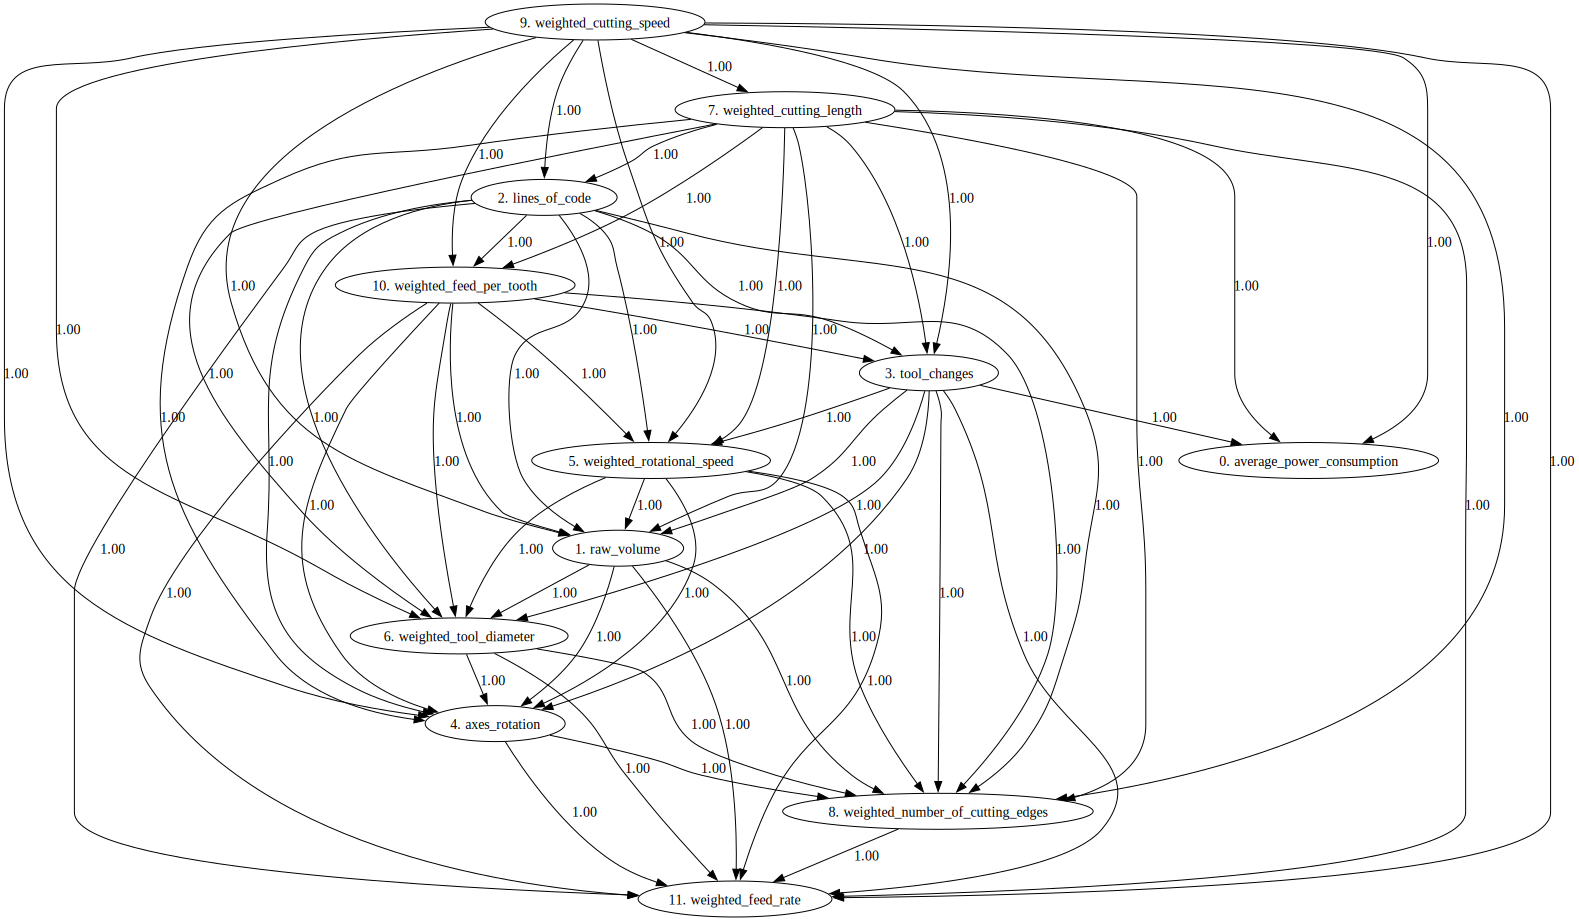

In [51]:
#create RESIT models for both dataframes
resit_pc = lingam.RESIT(regressor=reg)
resit_pc.fit(df_pc_sc)

#RESIT power consumption
pc_resit = make_dot(resit_pc.adjacency_matrix_, labels=labels_pc)

pc_resit

# Save png
#pc_resit.format = 'png'
#pc_resit.render('pc_resit')

In [52]:
# Create a DataFrame from the matrix with specific column and row names
resit_adjacency_matrix_pc = pd.DataFrame(resit_pc.adjacency_matrix_, columns=df_pc_sc.columns, index=df_pc_sc.columns)

display(resit_adjacency_matrix_pc)

print(resit_adjacency_matrix_pc.iloc[0])

average_power_consumption  raw_volume  \
average_power_consumption                               0.0         0.0   
raw_volume                                              0.0         0.0   
lines_of_code                                           0.0         0.0   
tool_changes                                            0.0         0.0   
axes_rotation                                           0.0         1.0   
weighted_rotational_speed                               0.0         0.0   
weighted_tool_diameter                                  0.0         1.0   
weighted_cutting_length                                 0.0         0.0   
weighted_number_of_cutting_edges                        0.0         1.0   
weighted_cutting_speed                                  0.0         0.0   
weighted_feed_per_tooth                                 0.0         0.0   
weighted_feed_rate                                      0.0         1.0   

                                  lines_of_code  tool_changes  axes_rotation  \
average_power_consumption                   0.0           1.0            0.0   
raw_volume                                  1.0           1.0            0.0   
lines_of_code                               0.0           0.0            0.0   
tool_changes                                1.0           0.0            0.0   
axes_rotation                               1.0           1.0            0.0   
weighted_rotational_speed                   1.0           1.0            0.0   
weighted_tool_diameter                      1.0           1.0            0.0   
weighted_cutting_length                     0.0           0.0            0.0   
weighted_number_of_cutting_edges            1.0           1.0            1.0   
weighted_cutting_speed                      0.0           0.0            0.0   
weighted_feed_per_tooth                     1.0           0.0            0.0   
weighted_feed_rate                          1.0           1.0            1.0   

                                  weighted_rotational_speed  \
average_power_consumption                               0.0   
raw_volume                                              1.0   
lines_of_code                                           0.0   
tool_changes                                            0.0   
axes_rotation                                           1.0   
weighted_rotational_speed                               0.0   
weighted_tool_diameter                                  1.0   
weighted_cutting_length                                 0.0   
weighted_number_of_cutting_edges                        1.0   
weighted_cutting_speed                                  0.0   
weighted_feed_per_tooth                                 0.0   
weighted_feed_rate                                      1.0   

                                  weighted_tool_diameter  \
average_power_consumption                            0.0   
raw_volume                                           0.0   
lines_of_code                                        0.0   
tool_changes                                         0.0   
axes_rotation                                        1.0   
weighted_rotational_speed                            0.0   
weighted_tool_diameter                               0.0   
weighted_cutting_length                              0.0   
weighted_number_of_cutting_edges                     1.0   
weighted_cutting_speed                               0.0   
weighted_feed_per_tooth                              0.0   
weighted_feed_rate                                   1.0   

                                  weighted_cutting_length  \
average_power_consumption                             1.0   
raw_volume                                            1.0   
lines_of_code                                         1.0   
tool_changes                                          1.0   
axes_rotation                                         1.0   
weighted_rotational_speed                         

average_power_consumption           0.0
raw_volume                          0.0
lines_of_code                       0.0
tool_changes                        1.0
axes_rotation                       0.0
weighted_rotational_speed           0.0
weighted_tool_diameter              0.0
weighted_cutting_length             1.0
weighted_number_of_cutting_edges    0.0
weighted_cutting_speed              1.0
weighted_feed_per_tooth             0.0
weighted_feed_rate                  0.0
Name: average_power_consumption, dtype: float64


#### There is a causal relationship between average power consumption and tool changes, cutting length, and cutting speed.

In [53]:
resit_pt = lingam.RESIT(regressor=reg)

resit_pt.fit(df_pt_sc)

#RESIT processing time
pt_resit = make_dot(resit_pt.adjacency_matrix_, labels=labels_pt)

# Save png
#pt_resit.format = 'png'
#pt_resit.render('dag')

In [54]:
# Create a DataFrame from the matrix with specific column and row names
resit_adjacency_matrix_pt = pd.DataFrame(resit_pt.adjacency_matrix_, columns=df_pt_sc.columns, index=df_pt_sc.columns)

display(resit_adjacency_matrix_pt)

print(resit_adjacency_matrix_pt.iloc[0])

processing_time  raw_volume  lines_of_code  \
processing_time                               0.0         1.0            1.0   
raw_volume                                    0.0         0.0            1.0   
lines_of_code                                 0.0         0.0            0.0   
tool_changes                                  0.0         0.0            1.0   
axes_rotation                                 0.0         1.0            1.0   
weighted_rotational_speed                     0.0         0.0            1.0   
weighted_tool_diameter                        0.0         1.0            1.0   
weighted_cutting_length                       0.0         0.0            0.0   
weighted_number_of_cutting_edges              0.0         1.0            1.0   
weighted_cutting_speed                        0.0         0.0            0.0   
weighted_feed_per_tooth                       0.0         0.0            1.0   
weighted_feed_rate                            0.0         1.0            1.0   

                                  tool_changes  axes_rotation  \
processing_time                            1.0            1.0   
raw_volume                                 1.0            0.0   
lines_of_code                              0.0            0.0   
tool_changes                               0.0            0.0   
axes_rotation                              1.0            0.0   
weighted_rotational_speed                  1.0            0.0   
weighted_tool_diameter                     1.0            0.0   
weighted_cutting_length                    0.0            0.0   
weighted_number_of_cutting_edges           1.0            1.0   
weighted_cutting_speed                     0.0            0.0   
weighted_feed_per_tooth                    0.0            0.0   
weighted_feed_rate                         1.0            1.0   

                                  weighted_rotational_speed  \
processing_time                                         1.0   
raw_volume                                              1.0   
lines_of_code                                           0.0   
tool_changes                                            0.0   
axes_rotation                                           1.0   
weighted_rotational_speed                               0.0   
weighted_tool_diameter                                  1.0   
weighted_cutting_length                                 0.0   
weighted_number_of_cutting_edges                        1.0   
weighted_cutting_speed                                  0.0   
weighted_feed_per_tooth                                 0.0   
weighted_feed_rate                                      1.0   

                                  weighted_tool_diameter  \
processing_time                                      1.0   
raw_volume                                           0.0   
lines_of_code                                        0.0   
tool_changes                                         0.0   
axes_rotation                                        1.0   
weighted_rotational_speed                            0.0   
weighted_tool_diameter                               0.0   
weighted_cutting_length                              0.0   
weighted_number_of_cutting_edges                     1.0   
weighted_cutting_speed                               0.0   
weighted_feed_per_tooth                              0.0   
weighted_feed_rate                                   1.0   

                                  weighted_cutting_length  \
processing_time                                       1.0   
raw_volume                                            1.0   
lines_of_code                                         1.0   
tool_changes                                          1.0   
axes_rotation                                         1.0   
weighted_rotational_speed                             1.0   
weighted_tool_diameter                                1.0   
weighted_cutting_length                               0.0 

processing_time                     0.0
raw_volume                          1.0
lines_of_code                       1.0
tool_changes                        1.0
axes_rotation                       1.0
weighted_rotational_speed           1.0
weighted_tool_diameter              1.0
weighted_cutting_length             1.0
weighted_number_of_cutting_edges    1.0
weighted_cutting_speed              1.0
weighted_feed_per_tooth             1.0
weighted_feed_rate                  1.0
Name: processing_time, dtype: float64


#### There is a causal relationship between processing time and the rest of variables in the dataset.

# Causal Estimation and Refutation

In [55]:
X = df_pc_sc.values
column_trial = []

for i in range(12): 
    column_trial.append(str(i))

#create a dataframe with column names as numbers for power consumption
df_pc_trial = pd.DataFrame(X, columns=column_trial)

In [56]:
X_pt = df_pt_sc.values
column_trial_pt = []

for i in range(12):
    column_trial_pt.append(str(i))
    
df_pt_trial = pd.DataFrame(X_pt, columns=column_trial_pt)

### Causal estimation and refutation for power consumption using DirectLiNGAM

In [57]:
G_lingam_pc = nx.from_numpy_array(lingam_pc.adjacency_matrix_.T, create_using=nx.DiGraph)
edge_labels_lingam_pc = dict([((v, u),f'{d["weight"]:.2f}',)for v, u, d in G_lingam_pc.edges(data=True)])

nx.write_gml(G_lingam_pc, 'causal_graph_lingam_pc.gml')

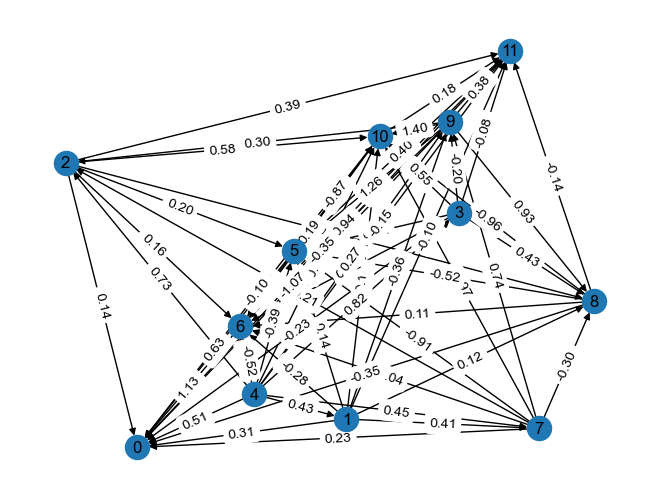

In [58]:
pos = nx.spring_layout(G_lingam_pc)
nx.draw(G_lingam_pc, pos, with_labels=True)
nx.draw_networkx_edge_labels(G_lingam_pc, pos, edge_labels=edge_labels_lingam_pc)
plt.show()

In [59]:
s = BytesIO()
nx.write_gml(G_lingam_pc, s)
gml_string_pc_lingam = s.getvalue().decode("utf-8")
gml_string_pc_lingam = gml_string_pc_lingam.replace('\n', '')

gml_string_pc_lingam

'graph [  directed 1  node [    id 0    label "0"  ]  node [    id 1    label "1"  ]  node [    id 2    label "2"  ]  node [    id 3    label "3"  ]  node [    id 4    label "4"  ]  node [    id 5    label "5"  ]  node [    id 6    label "6"  ]  node [    id 7    label "7"  ]  node [    id 8    label "8"  ]  node [    id 9    label "9"  ]  node [    id 10    label "10"  ]  node [    id 11    label "11"  ]  edge [    source 1    target 0    weight 0.30677931494144733  ]  edge [    source 1    target 5    weight 0.13549223261482524  ]  edge [    source 1    target 6    weight -0.27733221918195505  ]  edge [    source 1    target 7    weight 0.40643485441597677  ]  edge [    source 1    target 8    weight 0.1227444526841696  ]  edge [    source 1    target 9    weight -0.3596401542778951  ]  edge [    source 1    target 10    weight 0.15127794873725653  ]  edge [    source 1    target 11    weight -0.0957707630884245  ]  edge [    source 2    target 0    weight 0.13770883847836338  ]  edg

In [60]:
for num in range(12):
    try:
        if df_pc.columns[num] != 'average_power_consumption':
            # Create a CausalModel with the given treatment, outcome, and causal graph
            model = CausalModel(data=df_pc_trial, treatment=str(num), outcome="0", graph=gml_string_pc_lingam)

            # Identify the causal effect using the specified estimand method
            estimand = model.identify_effect(proceed_when_unidentifiable=True)
            print(f"Estimand for treatment {df_pc_sc.columns[num]}:\n{estimand}\n")

            # Estimate the causal effect using the backdoor linear regression method
            estimate = model.estimate_effect(estimand, method_name='backdoor.linear_regression', test_significance=True)
            print(f"Estimate for treatment {df_pc_sc.columns[num]}:\n{estimate}\n")

            refutation1 = model.refute_estimate(estimand, estimate, method_name='placebo_treatment_refuter', 
                                               placebo_type='permute', num_simulations=20)
            print(f"Placebo refuter for treatment {df_pc_sc.columns[num]}:\n{refutation1}\n")
            
            refutation2 = model.refute_estimate(estimand, estimate, method_name='random_common_cause', 
                                               placebo_type='permute', num_simulations=20)
            print(f"Random common cause refuter for treatment {df_pc_sc.columns[num]}:\n{refutation2}\n")
            
            refutation3 = model.refute_estimate(estimand, estimate, method_name='data_subset_refuter', 
                                               placebo_type='permute', num_simulations=20)
            print(f"Data subset refuter for treatment {df_pc_sc.columns[num]}:\n{refutation3}\n")

    except Exception as e:
        pass

Estimand for treatment raw_volume:
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
 d          
────(E[0|4])
d[1]        
Estimand assumption 1, Unconfoundedness: If U→{1} and U→0 then P(0|1,4,U) = P(0|1,4)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!


Estimate for treatment raw_volume:
*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
 d          
────(E[0|4])
d[1]        
Estimand assumption 1, Unconfoundedness: If U→{1} and U→0 then P(0|1,4,U) = P(0|1,4)

## Realized estimand
b: 0~1+4+1*3
Target units: 

## Estimate
Mean value: 0.2169422082808164
p-value: [0.0021342]
### Conditional Estimates
__categorical__3
(-1.0099999999999998, -0.797]    0.336068
(-0.797, -0.374]                 0.280089
(-0.374, 0.685]                  0.1759

Placebo refuter for treatment weighted_tool_diameter:
Refute: Use a Placebo Treatment
Estimated effect:1.0574144329520387
New effect:-0.0011346500451367171
p value:0.48921209403213173


Random common cause refuter for treatment weighted_tool_diameter:
Refute: Add a random common cause
Estimated effect:1.0574144329520387
New effect:1.0559686491150102
p value:0.39300074574303934


Data subset refuter for treatment weighted_tool_diameter:
Refute: Use a subset of data
Estimated effect:1.0574144329520387
New effect:1.0418719620487913
p value:0.38007862555701666


Estimand for treatment weighted_cutting_length:
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
 d            
────(E[0|1,4])
d[7]          
Estimand assumption 1, Unconfoundedness: If U→{7} and U→0 then P(0|7,1,4,U) = P(0|7,1,4)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!


Estimate 

Data subset refuter for treatment weighted_feed_rate:
Refute: Use a subset of data
Estimated effect:-0.39174010095714196
New effect:-0.42238622572485784
p value:0.3724539026307516




### Causal estimation and refutation for power consumption using RESIT

In [61]:
G_resit_pc = nx.from_numpy_array(resit_pc.adjacency_matrix_.T, create_using=nx.DiGraph)
edge_labels_resit_pc = dict([((v, u),f'{d["weight"]:.2f}',)for v, u, d in G_resit_pc.edges(data=True)])

nx.write_gml(G_resit_pc, 'causal_graph_lingam_pc.gml')

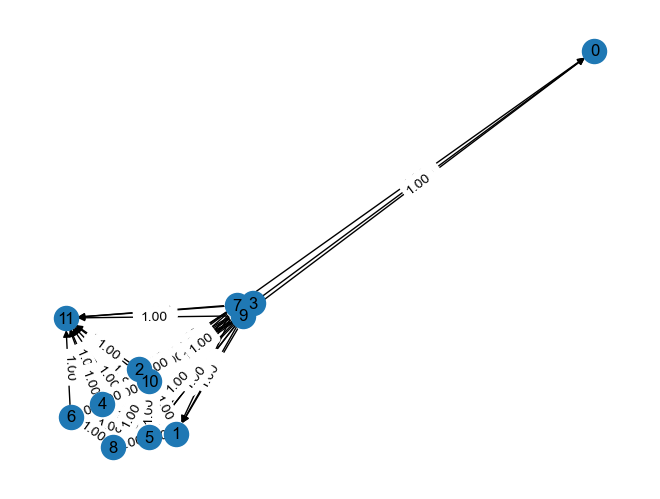

In [62]:
pos = nx.spring_layout(G_resit_pc)
nx.draw(G_resit_pc, pos, with_labels=True)
nx.draw_networkx_edge_labels(G_resit_pc, pos, edge_labels=edge_labels_resit_pc)
plt.show()

In [63]:
s = BytesIO()
nx.write_gml(G_resit_pc, s)
gml_string_pc_resit = s.getvalue().decode("utf-8")
gml_string_pc_resit = gml_string_pc_resit.replace('\n', '')
gml_string_pc_resit

'graph [  directed 1  node [    id 0    label "0"  ]  node [    id 1    label "1"  ]  node [    id 2    label "2"  ]  node [    id 3    label "3"  ]  node [    id 4    label "4"  ]  node [    id 5    label "5"  ]  node [    id 6    label "6"  ]  node [    id 7    label "7"  ]  node [    id 8    label "8"  ]  node [    id 9    label "9"  ]  node [    id 10    label "10"  ]  node [    id 11    label "11"  ]  edge [    source 1    target 4    weight 1.0  ]  edge [    source 1    target 6    weight 1.0  ]  edge [    source 1    target 8    weight 1.0  ]  edge [    source 1    target 11    weight 1.0  ]  edge [    source 2    target 1    weight 1.0  ]  edge [    source 2    target 3    weight 1.0  ]  edge [    source 2    target 4    weight 1.0  ]  edge [    source 2    target 5    weight 1.0  ]  edge [    source 2    target 6    weight 1.0  ]  edge [    source 2    target 8    weight 1.0  ]  edge [    source 2    target 10    weight 1.0  ]  edge [    source 2    target 11    weight 1.0  ] 

In [64]:
for num in range(12):
    try:
        if df_pc.columns[num] != 'average_power_consumption':
            # Create a CausalModel with the given treatment, outcome, and causal graph
            model = CausalModel(data=df_pc_trial, treatment=str(num), outcome="0", graph=gml_string_pc_resit)

            # Identify the causal effect using the specified estimand method
            estimand = model.identify_effect(proceed_when_unidentifiable=True)
            print(f"Estimand for treatment {df_pc_sc.columns[num]}:\n{estimand}\n")

            # Estimate the causal effect using the backdoor linear regression method
            estimate = model.estimate_effect(estimand, method_name='backdoor.linear_regression', test_significance=True)
            print(f"Estimate for treatment {df_pc_sc.columns[num]}:\n{estimate}Causal estimate: {str(estimate.value)}\n")

            refutation1 = model.refute_estimate(estimand, estimate, method_name='placebo_treatment_refuter', 
                                               placebo_type='permute', num_simulations=20)
            print(f"Placebo refuter for treatment {df_pc_sc.columns[num]}:\n{refutation1}\n")
            
            refutation2 = model.refute_estimate(estimand, estimate, method_name='random_common_cause', 
                                               placebo_type='permute', num_simulations=20)
            print(f"Random common cause refuter for treatment {df_pc_sc.columns[num]}:\n{refutation2}\n")
            
            refutation3 = model.refute_estimate(estimand, estimate, method_name='data_subset_refuter', 
                                               placebo_type='permute', num_simulations=20)
            print(f"Data subset refuter for treatment {df_pc_sc.columns[num]}:\n{refutation3}\n")
            
    
    except Exception as e:
        pass

Estimand for treatment raw_volume:
No directed path from ['1'] to ['0'] in the causal graph.
Causal effect is zero.

Estimate for treatment raw_volume:
*** Causal Estimate ***

## Identified estimand
No directed path from ['1'] to ['0'] in the causal graph.
Causal effect is zero.
## Realized estimand
None
## Estimate
Mean value: 0
Causal estimate: 0

Estimand for treatment lines_of_code:
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
 d            
────(E[0|9,7])
d[2]          
Estimand assumption 1, Unconfoundedness: If U→{2} and U→0 then P(0|2,9,7,U) = P(0|2,9,7)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!


Estimate for treatment lines_of_code:
*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
 d            
────(E[0|9,7])
d[2]  

Placebo refuter for treatment weighted_feed_per_tooth:
Refute: Use a Placebo Treatment
Estimated effect:-0.14031496328096785
New effect:-0.025375760231831114
p value:0.2839151209806221


Random common cause refuter for treatment weighted_feed_per_tooth:
Refute: Add a random common cause
Estimated effect:-0.14031496328096785
New effect:-0.13868121797980693
p value:0.27511872089992295


Data subset refuter for treatment weighted_feed_per_tooth:
Refute: Use a subset of data
Estimated effect:-0.14031496328096785
New effect:-0.1453836111082584
p value:0.42381968255753133


Estimand for treatment weighted_feed_rate:
No directed path from ['11'] to ['0'] in the causal graph.
Causal effect is zero.

Estimate for treatment weighted_feed_rate:
*** Causal Estimate ***

## Identified estimand
No directed path from ['11'] to ['0'] in the causal graph.
Causal effect is zero.
## Realized estimand
None
## Estimate
Mean value: 0
Causal estimate: 0



### Causal estimation and refutation for power consumption using hypothesis

In [65]:
G_manual_pc = nx.from_numpy_array(manual_matrix_pc.T, create_using=nx.DiGraph)
edge_labels_manual_pc = dict([((v, u),f'{d["weight"]:.2f}',)for v, u, d in G_manual_pc.edges(data=True)])

nx.write_gml(G_manual_pc, 'causal_graph_manual_pc.gml')

manual_matrix_pt

array([[0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0]])

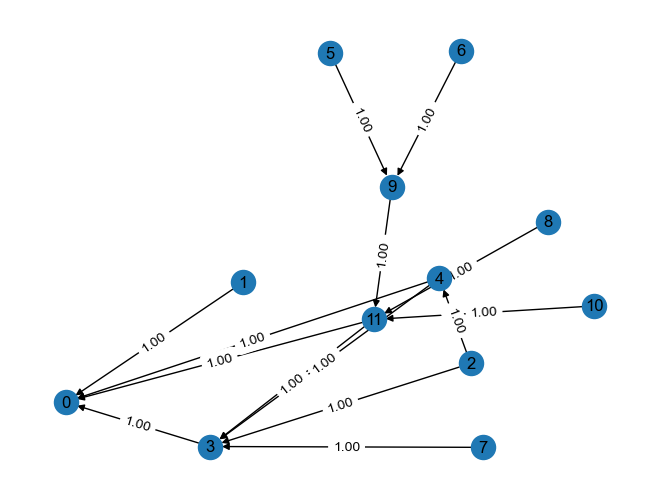

In [66]:
pos = nx.spring_layout(G_manual_pc)
nx.draw(G_manual_pc, pos, with_labels=True)
nx.draw_networkx_edge_labels(G_manual_pc, pos, edge_labels=edge_labels_manual_pc)
plt.show()

In [67]:
s = BytesIO()
nx.write_gml(G_manual_pc, s)
gml_string_pc_manual = s.getvalue().decode("utf-8").replace('\n', '')

#gml_string_pc_manual = gml_string_pc_manual.replace('\n', '')

In [68]:
for num in range(12):
    try:
        if df_pc.columns[num] != 'average_power_consumption':
            # Create a CausalModel with the given treatment, outcome, and causal graph
            model = CausalModel(data=df_pc_trial, treatment=str(num), outcome="0", graph=gml_string_pc_manual)

            # Identify the causal effect using the specified estimand method
            estimand = model.identify_effect(proceed_when_unidentifiable=True)
            print(f"Estimand for treatment {df_pc_sc.columns[num]}:\n{estimand}\n")

            # Estimate the causal effect using the backdoor linear regression method
            estimate = model.estimate_effect(estimand, method_name='backdoor.linear_regression', test_significance=True)
            print(f"Estimate for treatment {df_pc_sc.columns[num]}:\n{estimate}Causal estimate: {str(estimate.value)}\n")

            refutation1 = model.refute_estimate(estimand, estimate, method_name='placebo_treatment_refuter', 
                                               placebo_type='permute', num_simulations=20)
            print(f"Placebo refuter for treatment {df_pc_sc.columns[num]}:\n{refutation1}\n")
            
            refutation2 = model.refute_estimate(estimand, estimate, method_name='random_common_cause', 
                                               placebo_type='permute', num_simulations=20)
            print(f"Random common cause refuter for treatment {df_pc_sc.columns[num]}:\n{refutation2}\n")
            
            refutation3 = model.refute_estimate(estimand, estimate, method_name='data_subset_refuter', 
                                               placebo_type='permute', num_simulations=20)
            print(f"Data subset refuter for treatment {df_pc_sc.columns[num]}:\n{refutation3}\n")
            
    
    except Exception as e:
        pass

Estimand for treatment raw_volume:
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
 d        
────(E[0])
d[1]      
Estimand assumption 1, Unconfoundedness: If U→{1} and U→0 then P(0|1,,U) = P(0|1,)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!


Estimate for treatment raw_volume:
*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
 d        
────(E[0])
d[1]      
Estimand assumption 1, Unconfoundedness: If U→{1} and U→0 then P(0|1,,U) = P(0|1,)

## Realized estimand
b: 0~1+1*8+1*4+1*7+1*2+1*6+1*5+1*10+1*9+1*11+1*3
Target units: 

## Estimate
Mean value: 0.5360558644718556
p-value: [8.78774269e-20]
### Conditional Estimates
__categorical__8               __categorical__4  __categorical__7  __categorical__2  __categorical__6  __categorica

Placebo refuter for treatment raw_volume:
Refute: Use a Placebo Treatment
Estimated effect:0.5360558644718556
New effect:-0.007109839478039068
p value:0.4509653316500153


Random common cause refuter for treatment raw_volume:
Refute: Add a random common cause
Estimated effect:0.5360558644718556
New effect:0.5362535650053669
p value:0.48752744097008993


Data subset refuter for treatment raw_volume:
Refute: Use a subset of data
Estimated effect:0.5360558644718556
New effect:0.5178218530644723
p value:0.2827836140919404


Estimand for treatment lines_of_code:
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
 d        
────(E[0])
d[2]      
Estimand assumption 1, Unconfoundedness: If U→{2} and U→0 then P(0|2,,U) = P(0|2,)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!


Estimate for treatment lines_of_code:
*** Causal Estimate ***

## Identified

Data subset refuter for treatment lines_of_code:
Refute: Use a subset of data
Estimated effect:0.06710142686951137
New effect:0.07658090702645895
p value:0.4312722967819853


Estimand for treatment tool_changes:
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
 d             
────(E[0|4,11])
d[3]           
Estimand assumption 1, Unconfoundedness: If U→{3} and U→0 then P(0|3,4,11,U) = P(0|3,4,11)

### Estimand : 2
Estimand name: iv
Estimand expression:
 ⎡                   -1⎤
 ⎢ d      ⎛ d       ⎞  ⎥
E⎢────(0)⋅⎜────([3])⎟  ⎥
 ⎣d[7]    ⎝d[7]     ⎠  ⎦
Estimand assumption 1, As-if-random: If U→→0 then ¬(U →→{7})
Estimand assumption 2, Exclusion: If we remove {7}→{3}, then ¬({7}→0)

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!


Estimate for treatment tool_changes:
*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estiman

Placebo refuter for treatment axes_rotation:
Refute: Use a Placebo Treatment
Estimated effect:1.4455037118846463
New effect:0.036608704377972125
p value:0.3761901062430885


Random common cause refuter for treatment axes_rotation:
Refute: Add a random common cause
Estimated effect:1.4455037118846463
New effect:1.446827217345073
p value:0.4395074418137893


Data subset refuter for treatment axes_rotation:
Refute: Use a subset of data
Estimated effect:1.4455037118846463
New effect:1.4556924657821333
p value:0.45808668110223977


Estimand for treatment weighted_rotational_speed:
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
 d        
────(E[0])
d[5]      
Estimand assumption 1, Unconfoundedness: If U→{5} and U→0 then P(0|5,,U) = P(0|5,)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
Estimand expression:
 ⎡   d         ∂           ⎤
E⎢────────(0)⋅────([9  11])⎥
 ⎣d[9  

Estimate for treatment weighted_tool_diameter:
*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
 d        
────(E[0])
d[6]      
Estimand assumption 1, Unconfoundedness: If U→{6} and U→0 then P(0|6,,U) = P(0|6,)

## Realized estimand
b: 0~6+6*8+6*10+6*4+6*7+6*2+6*5+6*1
Target units: 

## Estimate
Mean value: 0.6652049058627174
p-value: [2.62389273e-19]
### Conditional Estimates
__categorical__8               __categorical__10              __categorical__4  __categorical__7  __categorical__2  __categorical__5  __categorical__1            
(-1.9809999999999999, -0.296]  (-1.2409999999999999, -0.574]  (-0.273, 0.445]   (0.18, 1.303]     (-0.696, -0.668]  (-2.415, -1.08]   (-1.035, 0.847]                -0.577421
                               (-0.322, 0.104]                (-0.55, -0.273]   (-1.185, -0.173]  (-0.668, -0.546]  (-1.08, 0.0251]   (-1.035, 0.847]                 0.24772

Placebo refuter for treatment weighted_cutting_length:
Refute: Use a Placebo Treatment
Estimated effect:0.9157938155011793
New effect:0.002701928013119014
p value:0.48618165323396406


Random common cause refuter for treatment weighted_cutting_length:
Refute: Add a random common cause
Estimated effect:0.9157938155011793
New effect:0.915837321602343
p value:0.4970920497538003


Data subset refuter for treatment weighted_cutting_length:
Refute: Use a subset of data
Estimated effect:0.9157938155011793
New effect:0.932557067726792
p value:0.3905929773366725


Estimand for treatment weighted_number_of_cutting_edges:
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
 d        
────(E[0])
d[8]      
Estimand assumption 1, Unconfoundedness: If U→{8} and U→0 then P(0|8,,U) = P(0|8,)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
Estimand expression:
 ⎡  d       d        ⎤
E⎢────

Data subset refuter for treatment weighted_number_of_cutting_edges:
Refute: Use a subset of data
Estimated effect:1.5998056510272551
New effect:1.5979981946668556
p value:0.4969250248753474


Estimand for treatment weighted_cutting_speed:
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
 d        
────(E[0])
d[9]      
Estimand assumption 1, Unconfoundedness: If U→{9} and U→0 then P(0|9,,U) = P(0|9,)

### Estimand : 2
Estimand name: iv
Estimand expression:
 ⎡                         -1⎤
 ⎢   d       ⎛   d        ⎞  ⎥
E⎢───────(0)⋅⎜───────([9])⎟  ⎥
 ⎣d[6  5]    ⎝d[6  5]     ⎠  ⎦
Estimand assumption 1, As-if-random: If U→→0 then ¬(U →→{6,5})
Estimand assumption 2, Exclusion: If we remove {6,5}→{9}, then ¬({6,5}→0)

### Estimand : 3
Estimand name: frontdoor
Estimand expression:
 ⎡  d       d        ⎤
E⎢─────(0)⋅────([11])⎥
 ⎣d[11]    d[9]      ⎦
Estimand assumption 1, Full-mediation: 11 intercepts (blocks) all directed paths from

Placebo refuter for treatment weighted_feed_per_tooth:
Refute: Use a Placebo Treatment
Estimated effect:0.6573666907489282
New effect:-0.0020009666347277806
p value:0.49171570122428077


Random common cause refuter for treatment weighted_feed_per_tooth:
Refute: Add a random common cause
Estimated effect:0.6573666907489282
New effect:0.6534960835182277
p value:0.3532479050722077


Data subset refuter for treatment weighted_feed_per_tooth:
Refute: Use a subset of data
Estimated effect:0.6573666907489282
New effect:0.6978630527029587
p value:0.2872976748843715


Estimand for treatment weighted_feed_rate:
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
  d        
─────(E[0])
d[11]      
Estimand assumption 1, Unconfoundedness: If U→{11} and U→0 then P(0|11,,U) = P(0|11,)

### Estimand : 2
Estimand name: iv
Estimand expression:
 ⎡                                  -1⎤
 ⎢     d         ⎛     d           ⎞  ⎥
E⎢───────────(0)⋅⎜─────

In [69]:
for num in range(12):
    try:
        if df_pc.columns[num] != 'average_power_consumption':
            # Create a CausalModel with the given treatment, outcome, and causal graph
            model = CausalModel(data=df_pc_trial, treatment=str(num), outcome="0", graph=gml_string_pc_manual)

            # Identify the causal effect using the specified estimand method
            estimand = model.identify_effect(proceed_when_unidentifiable=True)
            print(f"Estimand for treatment {df_pc_sc.columns[num]}:\n{estimand}\n")

            # Estimate the causal effect using the backdoor linear regression method
            estimate = model.estimate_effect(estimand, method_name='backdoor.linear_regression', test_significance=True)
            print(f"Estimate for treatment {df_pc_sc.columns[num]}:\n{estimate}Causal estimate: {str(estimate.value)}\n")

            refutation1 = model.refute_estimate(estimand, estimate, method_name='placebo_treatment_refuter', 
                                               placebo_type='permute', num_simulations=20)
            print(f"Placebo refuter for treatment {df_pc_sc.columns[num]}:\n{refutation1}\n")
            
            refutation2 = model.refute_estimate(estimand, estimate, method_name='random_common_cause', 
                                               placebo_type='permute', num_simulations=20)
            print(f"Random common cause refuter for treatment {df_pc_sc.columns[num]}:\n{refutation2}\n")
            
            refutation3 = model.refute_estimate(estimand, estimate, method_name='data_subset_refuter', 
                                               placebo_type='permute', num_simulations=20)
            print(f"Data subset refuter for treatment {df_pc_sc.columns[num]}:\n{refutation3}\n")
            
    
    except Exception as e:
        pass

Estimand for treatment raw_volume:
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
 d        
────(E[0])
d[1]      
Estimand assumption 1, Unconfoundedness: If U→{1} and U→0 then P(0|1,,U) = P(0|1,)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!


Estimate for treatment raw_volume:
*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
 d        
────(E[0])
d[1]      
Estimand assumption 1, Unconfoundedness: If U→{1} and U→0 then P(0|1,,U) = P(0|1,)

## Realized estimand
b: 0~1+1*8+1*4+1*7+1*2+1*6+1*5+1*10+1*9+1*11+1*3
Target units: 

## Estimate
Mean value: 0.5360558644718556
p-value: [8.78774269e-20]
### Conditional Estimates
__categorical__8               __categorical__4  __categorical__7  __categorical__2  __categorical__6  __categorica

Placebo refuter for treatment raw_volume:
Refute: Use a Placebo Treatment
Estimated effect:0.5360558644718556
New effect:-0.03092317439294557
p value:0.35353162512029357


Random common cause refuter for treatment raw_volume:
Refute: Add a random common cause
Estimated effect:0.5360558644718556
New effect:0.5354332468025179
p value:0.41612509204380566


Data subset refuter for treatment raw_volume:
Refute: Use a subset of data
Estimated effect:0.5360558644718556
New effect:0.5356154649260889
p value:0.4941493485283832


Estimand for treatment lines_of_code:
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
 d        
────(E[0])
d[2]      
Estimand assumption 1, Unconfoundedness: If U→{2} and U→0 then P(0|2,,U) = P(0|2,)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!


Estimate for treatment lines_of_code:
*** Causal Estimate ***

## Identified

Data subset refuter for treatment lines_of_code:
Refute: Use a subset of data
Estimated effect:0.06710142686951137
New effect:0.06708814877063103
p value:0.49992157877340426


Estimand for treatment tool_changes:
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
 d             
────(E[0|4,11])
d[3]           
Estimand assumption 1, Unconfoundedness: If U→{3} and U→0 then P(0|3,4,11,U) = P(0|3,4,11)

### Estimand : 2
Estimand name: iv
Estimand expression:
 ⎡                   -1⎤
 ⎢ d      ⎛ d       ⎞  ⎥
E⎢────(0)⋅⎜────([3])⎟  ⎥
 ⎣d[7]    ⎝d[7]     ⎠  ⎦
Estimand assumption 1, As-if-random: If U→→0 then ¬(U →→{7})
Estimand assumption 2, Exclusion: If we remove {7}→{3}, then ¬({7}→0)

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!


Estimate for treatment tool_changes:
*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estima

Placebo refuter for treatment axes_rotation:
Refute: Use a Placebo Treatment
Estimated effect:1.4455037118846463
New effect:0.025344957487201735
p value:0.41405696680729653


Random common cause refuter for treatment axes_rotation:
Refute: Add a random common cause
Estimated effect:1.4455037118846463
New effect:1.449542146660494
p value:0.29006747876944045


Data subset refuter for treatment axes_rotation:
Refute: Use a subset of data
Estimated effect:1.4455037118846463
New effect:1.4792594020776408
p value:0.3739905613784641


Estimand for treatment weighted_rotational_speed:
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
 d        
────(E[0])
d[5]      
Estimand assumption 1, Unconfoundedness: If U→{5} and U→0 then P(0|5,,U) = P(0|5,)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
Estimand expression:
 ⎡   d         ∂           ⎤
E⎢────────(0)⋅────([9  11])⎥
 ⎣d[9 

Estimate for treatment weighted_tool_diameter:
*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
 d        
────(E[0])
d[6]      
Estimand assumption 1, Unconfoundedness: If U→{6} and U→0 then P(0|6,,U) = P(0|6,)

## Realized estimand
b: 0~6+6*8+6*10+6*4+6*7+6*2+6*5+6*1
Target units: 

## Estimate
Mean value: 0.6652049058627174
p-value: [2.62389273e-19]
### Conditional Estimates
__categorical__8               __categorical__10              __categorical__4  __categorical__7  __categorical__2  __categorical__5  __categorical__1            
(-1.9809999999999999, -0.296]  (-1.2409999999999999, -0.574]  (-0.273, 0.445]   (0.18, 1.303]     (-0.696, -0.668]  (-2.415, -1.08]   (-1.035, 0.847]                -0.577421
                               (-0.322, 0.104]                (-0.55, -0.273]   (-1.185, -0.173]  (-0.668, -0.546]  (-1.08, 0.0251]   (-1.035, 0.847]                 0.24772

Placebo refuter for treatment weighted_cutting_length:
Refute: Use a Placebo Treatment
Estimated effect:0.9157938155011793
New effect:6.038484843311799e-05
p value:0.4996272607935906


Random common cause refuter for treatment weighted_cutting_length:
Refute: Add a random common cause
Estimated effect:0.9157938155011793
New effect:0.914467117069677
p value:0.40354295247669414


Data subset refuter for treatment weighted_cutting_length:
Refute: Use a subset of data
Estimated effect:0.9157938155011793
New effect:0.9429387588199021
p value:0.2948539764785699


Estimand for treatment weighted_number_of_cutting_edges:
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
 d        
────(E[0])
d[8]      
Estimand assumption 1, Unconfoundedness: If U→{8} and U→0 then P(0|8,,U) = P(0|8,)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
Estimand expression:
 ⎡  d       d        ⎤
E⎢──

Data subset refuter for treatment weighted_number_of_cutting_edges:
Refute: Use a subset of data
Estimated effect:1.5998056510272551
New effect:1.6408587301562143
p value:0.42750694129686606


Estimand for treatment weighted_cutting_speed:
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
 d        
────(E[0])
d[9]      
Estimand assumption 1, Unconfoundedness: If U→{9} and U→0 then P(0|9,,U) = P(0|9,)

### Estimand : 2
Estimand name: iv
Estimand expression:
 ⎡                         -1⎤
 ⎢   d       ⎛   d        ⎞  ⎥
E⎢───────(0)⋅⎜───────([9])⎟  ⎥
 ⎣d[6  5]    ⎝d[6  5]     ⎠  ⎦
Estimand assumption 1, As-if-random: If U→→0 then ¬(U →→{6,5})
Estimand assumption 2, Exclusion: If we remove {6,5}→{9}, then ¬({6,5}→0)

### Estimand : 3
Estimand name: frontdoor
Estimand expression:
 ⎡  d       d        ⎤
E⎢─────(0)⋅────([11])⎥
 ⎣d[11]    d[9]      ⎦
Estimand assumption 1, Full-mediation: 11 intercepts (blocks) all directed paths fro

Placebo refuter for treatment weighted_feed_per_tooth:
Refute: Use a Placebo Treatment
Estimated effect:0.6573666907489282
New effect:0.04396762202746226
p value:0.2991225940141381


Random common cause refuter for treatment weighted_feed_per_tooth:
Refute: Add a random common cause
Estimated effect:0.6573666907489282
New effect:0.6570089052301895
p value:0.48154895010427756


Data subset refuter for treatment weighted_feed_per_tooth:
Refute: Use a subset of data
Estimated effect:0.6573666907489282
New effect:0.6466815692892782
p value:0.4467952633790372


Estimand for treatment weighted_feed_rate:
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
  d        
─────(E[0])
d[11]      
Estimand assumption 1, Unconfoundedness: If U→{11} and U→0 then P(0|11,,U) = P(0|11,)

### Estimand : 2
Estimand name: iv
Estimand expression:
 ⎡                                  -1⎤
 ⎢     d         ⎛     d           ⎞  ⎥
E⎢───────────(0)⋅⎜────────

In [70]:
df_pc_sc.describe()

average_power_consumption    raw_volume  lines_of_code  tool_changes  \
count               2.200000e+02  2.200000e+02   2.200000e+02  2.200000e+02   
mean                3.229740e-16 -6.459479e-17   8.074349e-17  9.689219e-17   
std                 1.002281e+00  1.002281e+00   1.002281e+00  1.002281e+00   
min                -1.783306e+00 -1.217669e+00  -7.111368e-01 -1.008992e+00   
25%                -9.088765e-01 -1.208195e+00  -6.874299e-01 -7.971805e-01   
50%                 4.156962e-02  8.471302e-01  -6.189723e-01 -3.735580e-01   
75%                 8.567221e-01  8.471302e-01   6.842285e-01  1.030173e-01   
max                 2.114388e+00  8.471302e-01   3.921108e+00  2.591799e+00   

       axes_rotation  weighted_rotational_speed  weighted_tool_diameter  \
count   2.200000e+02                 220.000000            2.200000e+02   
mean   -3.229740e-17                   0.000000            4.521636e-16   
std     1.002281e+00                   1.002281            1.002281e+00   
min    -6.326083e-01                  -2.413925           -2.036332e+00   
25%    -5.773367e-01                  -0.281427           -6.953745e-01   
50%    -3.838862e-01                   0.235045            3.561531e-02   
75%     1.964653e-01                   0.339736            8.611503e-01   
max     2.960044e+00                   1.743625            1.747987e+00   

       weighted_cutting_length  weighted_number_of_cutting_edges  \
count             2.200000e+02                      2.200000e+02   
mean              1.291896e-16                     -5.894275e-16   
std               1.002281e+00                      1.002281e+00   
min              -1.613877e+00                     -1.980350e+00   
25%              -9.841519e-01                      5.994204e-02   
50%              -8.910748e-03                      1.060346e-01   
75%               9.712678e-01                      5.107381e-01   
max               1.618993e+00                      1.708642e+00   

       weighted_cutting_speed  weighted_feed_per_tooth  weighted_feed_rate  
count            2.200000e+02             2.200000e+02        2.200000e+02  
mean             3.229740e-17            -4.844610e-17       -2.745279e-16  
std              1.002281e+00             1.002281e+00        1.002281e+00  
min             -1.975593e+00            -1.240201e+00       -1.965482e+00  
25%             -7.912052e-01            -5.735715e-01       -8.902984e-01  
50%              9.163502e-02            -1.637367e-01       -2.787946e-04  
75%              8.949193e-01             1.646529e-01        7.551187e-01  
max              1.375971e+00             6.748678e+00        1.951041e+00

#### Causal estimation and refutation for processing time using Lingam

In [71]:
G_lingam_pt = nx.from_numpy_array(lingam_pt.adjacency_matrix_.T, create_using=nx.DiGraph)
edge_labels_lingam_pt = dict([((v, u),f'{d["weight"]:.2f}',)for v, u, d in G_lingam_pt.edges(data=True)])

nx.write_gml(G_lingam_pt, 'causal_graph_lingam_pt.gml')

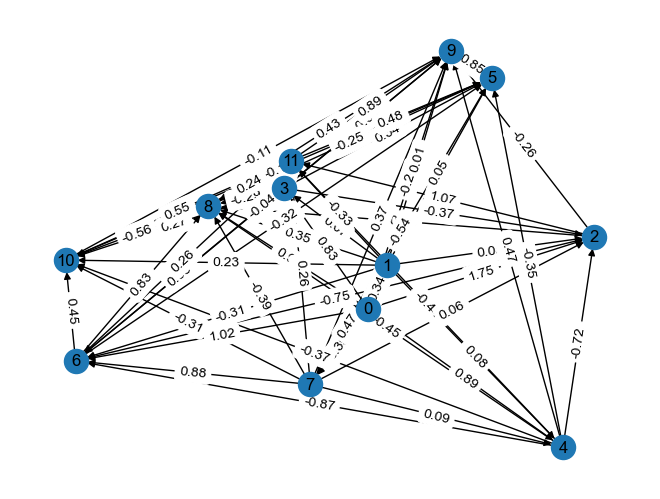

In [72]:
pos = nx.spring_layout(G_lingam_pt)
nx.draw(G_lingam_pt, pos, with_labels=True)
nx.draw_networkx_edge_labels(G_lingam_pt, pos, edge_labels=edge_labels_lingam_pt)
plt.show()

In [73]:
s = BytesIO()
nx.write_gml(G_lingam_pt, s)
gml_string_pt_lingam = s.getvalue().decode("utf-8")
gml_string_pt_lingam = gml_string_pt_lingam.replace('\n', '')

gml_string_pt_lingam

'graph [  directed 1  node [    id 0    label "0"  ]  node [    id 1    label "1"  ]  node [    id 2    label "2"  ]  node [    id 3    label "3"  ]  node [    id 4    label "4"  ]  node [    id 5    label "5"  ]  node [    id 6    label "6"  ]  node [    id 7    label "7"  ]  node [    id 8    label "8"  ]  node [    id 9    label "9"  ]  node [    id 10    label "10"  ]  node [    id 11    label "11"  ]  edge [    source 0    target 1    weight 0.3368308452128683  ]  edge [    source 0    target 2    weight 1.7526929898280712  ]  edge [    source 0    target 3    weight 0.8310682943439306  ]  edge [    source 0    target 4    weight 0.891139852183432  ]  edge [    source 0    target 6    weight 1.024008855157089  ]  edge [    source 0    target 7    weight 0.3945060545082353  ]  edge [    source 0    target 8    weight 0.9607747872330734  ]  edge [    source 0    target 9    weight -0.19842495462575313  ]  edge [    source 1    target 2    weight 0.05074831409507419  ]  edge [    sou

In [74]:
for num in range(12):
    try:
        if df_pt.columns[num] != 'processing_time':
            # Create a CausalModel with the given treatment, outcome, and causal graph
            model = CausalModel(data=df_pt_trial, treatment=str(num), outcome="0", graph=gml_string_pt_lingam)

            # Identify the causal effect using the specified estimand method
            estimand = model.identify_effect(proceed_when_unidentifiable=True)
            print(f"Estimand for treatment {df_pc_sc.columns[num]}:\n{estimand}\n")

            # Estimate the causal effect using the backdoor linear regression method
            estimate = model.estimate_effect(estimand, method_name='backdoor.linear_regression', test_significance=True)
            print(f"Estimate for treatment {df_pc_sc.columns[num]}:\n{estimate}Causal estimate: {str(estimate.value)}\n")

            refutation = model.refute_estimate(estimand, estimate, method_name='placebo_treatment_refuter', 
                                               placebo_type='permute', num_simulations=20)
            print(f"Refutation for treatment {df_pc_sc.columns[num]}:\n{refutation}\n")

    except Exception as e:
        pass

Estimand for treatment raw_volume:
No directed path from ['1'] to ['0'] in the causal graph.
Causal effect is zero.

Estimate for treatment raw_volume:
*** Causal Estimate ***

## Identified estimand
No directed path from ['1'] to ['0'] in the causal graph.
Causal effect is zero.
## Realized estimand
None
## Estimate
Mean value: 0
Causal estimate: 0

Estimand for treatment lines_of_code:
No directed path from ['2'] to ['0'] in the causal graph.
Causal effect is zero.

Estimate for treatment lines_of_code:
*** Causal Estimate ***

## Identified estimand
No directed path from ['2'] to ['0'] in the causal graph.
Causal effect is zero.
## Realized estimand
None
## Estimate
Mean value: 0
Causal estimate: 0

Estimand for treatment tool_changes:
No directed path from ['3'] to ['0'] in the causal graph.
Causal effect is zero.

Estimate for treatment tool_changes:
*** Causal Estimate ***

## Identified estimand
No directed path from ['3'] to ['0'] in the causal graph.
Causal effect is zero.
## 

#### Causal estimation and refutation for processing time using RESIT

In [75]:
G_resit_pt = nx.from_numpy_array(resit_pt.adjacency_matrix_.T, create_using=nx.DiGraph)
edge_labels_resit_pt = dict([((v, u),f'{d["weight"]:.2f}',)for v, u, d in G_resit_pt.edges(data=True)])

nx.write_gml(G_resit_pt, 'causal_graph_resit_pt.gml')

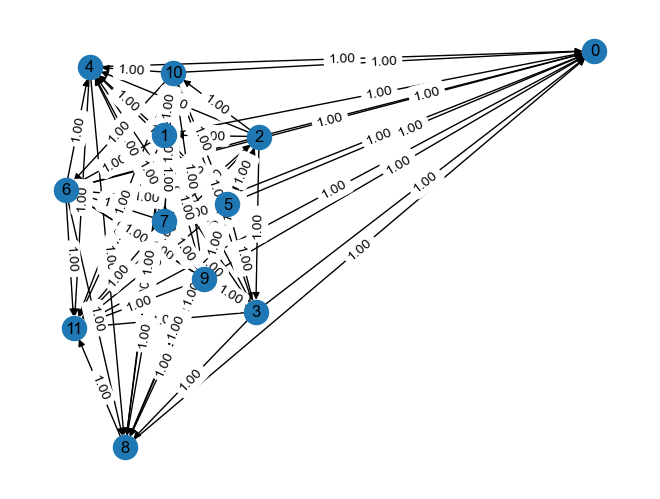

In [76]:
pos = nx.spring_layout(G_resit_pt)
nx.draw(G_resit_pt, pos, with_labels=True)
nx.draw_networkx_edge_labels(G_resit_pt, pos, edge_labels=edge_labels_resit_pt)
plt.show()

In [77]:
s = BytesIO()
nx.write_gml(G_resit_pt, s)
gml_string_pt_resit = s.getvalue().decode("utf-8")
gml_string_pt_resit = gml_string_pt_resit.replace('\n', '')

In [78]:
for num in range(12):
    try:
        if df_pt.columns[num] != 'processing_time':
            # Create a CausalModel with the given treatment, outcome, and causal graph
            model = CausalModel(data=df_pt_trial, treatment=str(num), outcome="0", graph=gml_string_pt_resit)

            # Identify the causal effect using the specified estimand method
            estimand = model.identify_effect(proceed_when_unidentifiable=True)
            print(f"Estimand for treatment {df_pc_sc.columns[num]}:\n{estimand}\n")

            # Estimate the causal effect using the backdoor linear regression method
            estimate = model.estimate_effect(estimand, method_name='backdoor.linear_regression', test_significance=True)
            print(f"Estimate for treatment {df_pc_sc.columns[num]}:\n{estimate}Causal estimate: {str(estimate.value)}\n")

            refutation1 = model.refute_estimate(estimand, estimate, method_name='placebo_treatment_refuter', 
                                               placebo_type='permute', num_simulations=20)
            print(f"Placebo refuter for treatment {df_pc_sc.columns[num]}:\n{refutation1}\n")
            
            refutation2 = model.refute_estimate(estimand, estimate, method_name='random_common_cause', 
                                               placebo_type='permute', num_simulations=20)
            print(f"Random common cause refuter for treatment {df_pc_sc.columns[num]}:\n{refutation2}\n")
            
            refutation3 = model.refute_estimate(estimand, estimate, method_name='data_subset_refuter', 
                                               placebo_type='permute', num_simulations=20)
            print(f"Data subset refuter for treatment {df_pc_sc.columns[num]}:\n{refutation3}\n")

    except Exception as e:
        pass

Estimand for treatment raw_volume:
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
 d                     
────(E[0|7,2,5,10,9,3])
d[1]                   
Estimand assumption 1, Unconfoundedness: If U→{1} and U→0 then P(0|1,7,2,5,10,9,3,U) = P(0|1,7,2,5,10,9,3)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!


Estimate for treatment raw_volume:
*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
 d                     
────(E[0|7,2,5,10,9,3])
d[1]                   
Estimand assumption 1, Unconfoundedness: If U→{1} and U→0 then P(0|1,7,2,5,10,9,3,U) = P(0|1,7,2,5,10,9,3)

## Realized estimand
b: 0~1+7+2+5+10+9+3
Target units: ate

## Estimate
Mean value: -0.009327813115969006
p-value: [0.75054104]
Causal estimate: -0.009327813115969006

Pl

Placebo refuter for treatment weighted_tool_diameter:
Refute: Use a Placebo Treatment
Estimated effect:-0.25092351137248964
New effect:-0.0052573966522419
p value:0.39662307777384576


Random common cause refuter for treatment weighted_tool_diameter:
Refute: Add a random common cause
Estimated effect:-0.25092351137248964
New effect:-0.25093054427288436
p value:0.49923086545576967


Data subset refuter for treatment weighted_tool_diameter:
Refute: Use a subset of data
Estimated effect:-0.25092351137248964
New effect:-0.2411318347621601
p value:0.37854257491141985


Estimand for treatment weighted_cutting_length:
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
 d          
────(E[0|9])
d[7]        
Estimand assumption 1, Unconfoundedness: If U→{7} and U→0 then P(0|7,9,U) = P(0|7,9)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!


Estimate for 

Data subset refuter for treatment weighted_feed_rate:
Refute: Use a subset of data
Estimated effect:0.10841217369222965
New effect:0.10704212868484748
p value:0.48401231654865684




In [79]:
G_manual_pt = nx.from_numpy_array(manual_matrix_pt.T, create_using=nx.DiGraph)
edge_labels_manual_pt = dict([((v, u),f'{d["weight"]:.2f}',)for v, u, d in G_manual_pt.edges(data=True)])

nx.write_gml(G_manual_pt, 'causal_graph_manual_pt.gml')

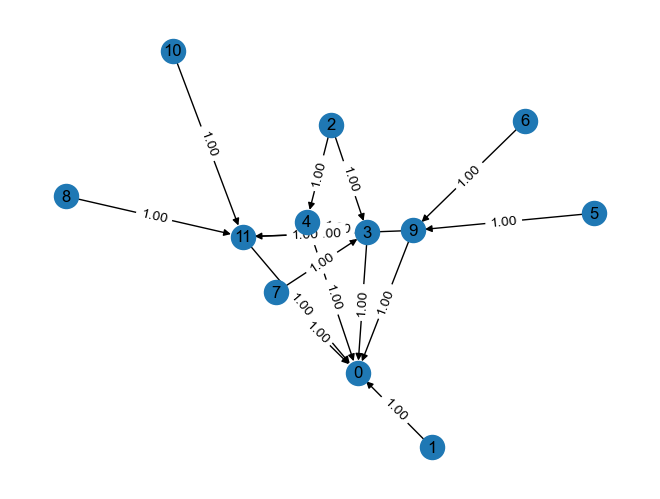

In [80]:
pos = nx.spring_layout(G_manual_pt)
nx.draw(G_manual_pt, pos, with_labels=True)
nx.draw_networkx_edge_labels(G_manual_pt, pos, edge_labels=edge_labels_manual_pt)
plt.show()

In [81]:
s = BytesIO()
nx.write_gml(G_manual_pt, s)
gml_string_pt_manual = s.getvalue().decode("utf-8")
gml_string_pt_manual = gml_string_pt_manual.replace('\n', '')

In [ ]:
for num in range(12):
    try:
        if df_pt.columns[num] != 'processing_time':
            # Create a CausalModel with the given treatment, outcome, and causal graph
            model = CausalModel(data=df_pt_trial, treatment=str(num), outcome="0", graph=gml_string_pt_manual)

            # Identify the causal effect using the specified estimand method
            estimand = model.identify_effect(proceed_when_unidentifiable=True)
            print(f"Estimand for treatment {df_pc_sc.columns[num]}:\n{estimand}\n")

            # Estimate the causal effect using the backdoor linear regression method
            estimate = model.estimate_effect(estimand, method_name='backdoor.linear_regression', test_significance=True)
            print(f"Estimate for treatment {df_pc_sc.columns[num]}:\n{estimate}Causal estimate: {str(estimate.value)}\n")

            refutation1 = model.refute_estimate(estimand, estimate, method_name='placebo_treatment_refuter', 
                                               placebo_type='permute', num_simulations=20)
            print(f"Placebo refuter for treatment {df_pc_sc.columns[num]}:\n{refutation1}\n")
            
            refutation2 = model.refute_estimate(estimand, estimate, method_name='random_common_cause', 
                                               placebo_type='permute', num_simulations=20)
            print(f"Random common cause refuter for treatment {df_pc_sc.columns[num]}:\n{refutation2}\n")
            
            refutation3 = model.refute_estimate(estimand, estimate, method_name='data_subset_refuter', 
                                               placebo_type='permute', num_simulations=20)
            print(f"Data subset refuter for treatment {df_pc_sc.columns[num]}:\n{refutation3}\n")

    except Exception as e:
        pass

Estimand for treatment raw_volume:
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
 d        
────(E[0])
d[1]      
Estimand assumption 1, Unconfoundedness: If U→{1} and U→0 then P(0|1,,U) = P(0|1,)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!


Estimate for treatment raw_volume:
*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
 d        
────(E[0])
d[1]      
Estimand assumption 1, Unconfoundedness: If U→{1} and U→0 then P(0|1,,U) = P(0|1,)

## Realized estimand
b: 0~1+1*8+1*4+1*7+1*2+1*6+1*5+1*10+1*9+1*11+1*3
Target units: 

## Estimate
Mean value: 0.4530806499766024
p-value: [1.26435537e-79]
### Conditional Estimates
__categorical__8               __categorical__4  __categorical__7  __categorical__2  __categorical__6  __categorica

Placebo refuter for treatment raw_volume:
Refute: Use a Placebo Treatment
Estimated effect:0.4530806499766024
New effect:0.014520623423143125
p value:0.4127107936035397


Random common cause refuter for treatment raw_volume:
Refute: Add a random common cause
Estimated effect:0.4530806499766024
New effect:0.4529711826696956
p value:0.4345230867109511


Data subset refuter for treatment raw_volume:
Refute: Use a subset of data
Estimated effect:0.4530806499766024
New effect:0.4581263764289778
p value:0.4533117070006156


Estimand for treatment lines_of_code:
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
 d        
────(E[0])
d[2]      
Estimand assumption 1, Unconfoundedness: If U→{2} and U→0 then P(0|2,,U) = P(0|2,)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!


Estimate for treatment lines_of_code:
*** Causal Estimate ***

## Identified e

Data subset refuter for treatment lines_of_code:
Refute: Use a subset of data
Estimated effect:0.5651653056022112
New effect:0.5211939614228067
p value:0.286723083895591


Estimand for treatment tool_changes:
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
 d               
────(E[0|7,4,11])
d[3]             
Estimand assumption 1, Unconfoundedness: If U→{3} and U→0 then P(0|3,7,4,11,U) = P(0|3,7,4,11)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!


Estimate for treatment tool_changes:
*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
 d               
────(E[0|7,4,11])
d[3]             
Estimand assumption 1, Unconfoundedness: If U→{3} and U→0 then P(0|3,7,4,11,U) = P(0|3,7,4,11)

## Realized estimand
b: 0~3+7+4+11+3*1
Target units: 


Placebo refuter for treatment axes_rotation:
Refute: Use a Placebo Treatment
Estimated effect:0.41534743129794344
New effect:0.009292065749118086
p value:0.44229797216391287


Random common cause refuter for treatment axes_rotation:
Refute: Add a random common cause
Estimated effect:0.41534743129794344
New effect:0.4147933876080506
p value:0.427607291085894


Data subset refuter for treatment axes_rotation:
Refute: Use a subset of data
Estimated effect:0.41534743129794344
New effect:0.4086744699946198
p value:0.37178015987404756


Estimand for treatment weighted_rotational_speed:
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
 d        
────(E[0])
d[5]      
Estimand assumption 1, Unconfoundedness: If U→{5} and U→0 then P(0|5,,U) = P(0|5,)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
Estimand expression:
 ⎡   d         ∂           ⎤
E⎢────────(0)⋅────([9  11])⎥
 ⎣d